## IBM Data Science - Applied Data Science Project


## Capstone Project - The Battle of Neighborhoods (Week 2)

---

### Vasileios Fafoutis
### 12.12.2020

---

The notebook is divided in 4 big sections:

    1. Retrieval and preprocessing of data
    2. 1st visualization and further preprocessing (preparation for the machine learning algorithm)
    3. Running the machine learning algorithm (k-means)
    4. Results visualization and understanding




# 1. Retrieval and and 1st preprocessing of data

---

**Getting neighborhood data from Gov Cat Open Data Website and coordinates from Geopy**

---


In [ ]:
#Importing all relevant libraries
!conda install -c conda-forge geopy --yes
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors
from geopy.geocoders import Nominatim
import requests
from pandas.io.json import json_normalize
! pip install folium==0.5.0
import folium # plotting library
print('Libraries imported.')

In [2]:
#Import Data from Catalunya Open Gov API
url = 'https://opendata-ajuntament.barcelona.cat/data/api/action/datastore_search?resource_id=4cc59b76-a977-40ac-8748-61217c8ff367'
r = requests.get(url)
json = r.json()
#Choosing the keys with relevant data
#json.keys()
json2=json['result']
#One more level
#json2.keys()
json3=json2['records']
#Check first record
json3[0]
# define the dataframe columns
column_names = ['CODI_DISTRICTE', 'NOM_DISTRICTE', 'CODI_BARRI', 'NOM_BARRI'] 
# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)
#Check neighborhood empty dataframe
neighborhoods


#fill Barcelona neighborhoods datarame
for data in json3:
    district_code = data['CODI_DISTRICTE']
    district_name = data['NOM_DISTRICTE'] 
    barri_code = data['CODI_BARRI']  
    barri_name = data['NOM_BARRI']
    
    neighborhoods = neighborhoods.append({'CODI_DISTRICTE': district_code,
                                          'NOM_DISTRICTE': district_name,
                                          'CODI_BARRI': barri_code,
                                          'NOM_BARRI': barri_name}, ignore_index=True)
    
#Check new filled dataframe
neighborhoods

CODI_DISTRICTE NOM_DISTRICTE CODI_BARRI  \
0               1  Ciutat Vella          1   
1               1  Ciutat Vella          2   
2               1  Ciutat Vella          3   
3               1  Ciutat Vella          4   
4               2      Eixample          5   
..            ...           ...        ...   
68             10    Sant Martí         69   
69             10    Sant Martí         70   
70             10    Sant Martí         71   
71             10    Sant Martí         72   
72             10    Sant Martí         73   

                                       NOM_BARRI  
0                                       el Raval  
1                                 el Barri Gòtic  
2                                 la Barceloneta  
3          Sant Pere, Santa Caterina i la Ribera  
4                                  el Fort Pienc  
..                                           ...  
68  Diagonal Mar i el Front Marítim del Poblenou  
69                         el Besòs i el Maresme  
70                       Provençals del Poblenou  
71                      Sant Martí de Provençals  
72                           la Verneda i la Pau  

[73 rows x 4 columns]

In [3]:
#create text to help coordinates search
neighborhoods2=neighborhoods['NOM_BARRI']+' ,'+neighborhoods['NOM_DISTRICTE']+' ,Barcelona, Spain'
neighborhoods2
#... and assign it to a dataframe
test=pd.DataFrame(neighborhoods2)
test


#concatenate horizontally the two dataframes
test2=pd.concat([test,neighborhoods], axis=1, ignore_index = True)
test2
#rename the columns
test2.columns=['Address','District_Number','District','Neighborhood_number', 'Neighborhood']
test2

Address District_Number  \
0            el Raval ,Ciutat Vella ,Barcelona, Spain               1   
1      el Barri Gòtic ,Ciutat Vella ,Barcelona, Spain               1   
2      la Barceloneta ,Ciutat Vella ,Barcelona, Spain               1   
3   Sant Pere, Santa Caterina i la Ribera ,Ciutat ...               1   
4           el Fort Pienc ,Eixample ,Barcelona, Spain               2   
..                                                ...             ...   
68  Diagonal Mar i el Front Marítim del Poblenou ,...              10   
69  el Besòs i el Maresme ,Sant Martí ,Barcelona, ...              10   
70  Provençals del Poblenou ,Sant Martí ,Barcelona...              10   
71  Sant Martí de Provençals ,Sant Martí ,Barcelon...              10   
72  la Verneda i la Pau ,Sant Martí ,Barcelona, Spain              10   

        District Neighborhood_number  \
0   Ciutat Vella                   1   
1   Ciutat Vella                   2   
2   Ciutat Vella                   3   
3   Ciutat Vella                   4   
4       Eixample                   5   
..           ...                 ...   
68    Sant Martí                  69   
69    Sant Martí                  70   
70    Sant Martí                  71   
71    Sant Martí                  72   
72    Sant Martí                  73   

                                    Neighborhood  
0                                       el Raval  
1                                 el Barri Gòtic  
2                                 la Barceloneta  
3          Sant Pere, Santa Caterina i la Ribera  
4                                  el Fort Pienc  
..                                           ...  
68  Diagonal Mar i el Front Marítim del Poblenou  
69                         el Besòs i el Maresme  
70                       Provençals del Poblenou  
71                      Sant Martí de Provençals  
72                           la Verneda i la Pau  

[73 rows x 5 columns]

In [4]:
#Slight correction on name to avoid confusion with a nearby municipality "Sant Andreu"
test2.at[59,'Address']='Sant Andreu de Palomar,Sant Andreu ,Barcelona, Spain'

In [5]:
test2.at[59,'Address']

'Sant Andreu de Palomar,Sant Andreu ,Barcelona, Spain'

In [6]:
#Create a Dataframe with the latitude and longitude of every district in Barcelona
column_names = ['Address','Lat', 'Long']
Neighborhood_coordinates = pd.DataFrame(columns=column_names)
Neighborhood_coordinates



#Loop to fil the table
for ind in range(0,73):
    address = test2['Address'][ind]
    geolocator = Nominatim(user_agent="BCN_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    #print('The geograpical coordinate of {} are {}, {}.'.format(location, latitude, longitude))
    Neighborhood_coordinates = Neighborhood_coordinates.append({'Address': address,
                                          'Lat': latitude,
                                          'Long': longitude}, ignore_index=True)
    
Neighborhood_coordinates

Address        Lat      Long
0            el Raval ,Ciutat Vella ,Barcelona, Spain  41.379518  2.168368
1      el Barri Gòtic ,Ciutat Vella ,Barcelona, Spain  41.383395  2.176912
2      la Barceloneta ,Ciutat Vella ,Barcelona, Spain  41.380653  2.189927
3   Sant Pere, Santa Caterina i la Ribera ,Ciutat ...  41.388322  2.177411
4           el Fort Pienc ,Eixample ,Barcelona, Spain  41.395925  2.182325
..                                                ...        ...       ...
68  Diagonal Mar i el Front Marítim del Poblenou ,...  41.405228  2.213352
69  el Besòs i el Maresme ,Sant Martí ,Barcelona, ...  41.414979  2.213877
70  Provençals del Poblenou ,Sant Martí ,Barcelona...  41.411948  2.204125
71  Sant Martí de Provençals ,Sant Martí ,Barcelon...  41.416519  2.198968
72  la Verneda i la Pau ,Sant Martí ,Barcelona, Spain  41.423220  2.202940

[73 rows x 3 columns]

In [7]:
#Join tables Neighborhood coordinates & test2...
Base_Table = pd.concat([Neighborhood_coordinates, test2], axis=1).reindex(Neighborhood_coordinates.index)
Base_Table

#Rename the fields
Base_Table.columns = ['Address1', 'Lat','Long','Adress2','DistrictNr','District','NeighborhoodNr','Neighborhood']
Base_Table

#Delete the duplicated field
del Base_Table['Adress2']
Base_Table

#This will be the base table to work on. It contains a list of all neighborhoods of Barcelona, with their coordinates.
#As a next step we will fill all the remaining fields for the classification - criminality, rent, population density, venues from Foursquare etc...

Address1        Lat      Long  \
0            el Raval ,Ciutat Vella ,Barcelona, Spain  41.379518  2.168368   
1      el Barri Gòtic ,Ciutat Vella ,Barcelona, Spain  41.383395  2.176912   
2      la Barceloneta ,Ciutat Vella ,Barcelona, Spain  41.380653  2.189927   
3   Sant Pere, Santa Caterina i la Ribera ,Ciutat ...  41.388322  2.177411   
4           el Fort Pienc ,Eixample ,Barcelona, Spain  41.395925  2.182325   
..                                                ...        ...       ...   
68  Diagonal Mar i el Front Marítim del Poblenou ,...  41.405228  2.213352   
69  el Besòs i el Maresme ,Sant Martí ,Barcelona, ...  41.414979  2.213877   
70  Provençals del Poblenou ,Sant Martí ,Barcelona...  41.411948  2.204125   
71  Sant Martí de Provençals ,Sant Martí ,Barcelon...  41.416519  2.198968   
72  la Verneda i la Pau ,Sant Martí ,Barcelona, Spain  41.423220  2.202940   

   DistrictNr      District NeighborhoodNr  \
0           1  Ciutat Vella              1   
1           1  Ciutat Vella              2   
2           1  Ciutat Vella              3   
3           1  Ciutat Vella              4   
4           2      Eixample              5   
..        ...           ...            ...   
68         10    Sant Martí             69   
69         10    Sant Martí             70   
70         10    Sant Martí             71   
71         10    Sant Martí             72   
72         10    Sant Martí             73   

                                    Neighborhood  
0                                       el Raval  
1                                 el Barri Gòtic  
2                                 la Barceloneta  
3          Sant Pere, Santa Caterina i la Ribera  
4                                  el Fort Pienc  
..                                           ...  
68  Diagonal Mar i el Front Marítim del Poblenou  
69                         el Besòs i el Maresme  
70                       Provençals del Poblenou  
71                      Sant Martí de Provençals  
72                           la Verneda i la Pau  

[73 rows x 7 columns]

# 2. Data exploration and further preprocessing before running a machine learning algorithm

---

**Creating a 1st map visualization**

---

In [8]:
#Create a map visualization of our dataframe
# create map of Barcelona using latitude and longitude values
map_Barcelona_downtown = folium.Map(location=[41.3851, 2.1734], zoom_start=14)

folium.CircleMarker(
        [41.3851, 2.1734],
        radius=10,
        popup='Barcelona',
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.2,
        parse_html=False).add_to(map_Barcelona_downtown)

# add markers to map
for lat, lng, district, neighborhood in zip(Base_Table['Lat'], Base_Table['Long'], Base_Table['District'], Base_Table['Neighborhood']):
    label = '{}, {}'.format(neighborhood, district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Barcelona_downtown)  
    
map_Barcelona_downtown

---

**Exploring neighborhoods through Foursquare - starting from the first one**

---

In [ ]:
#Starting to explore Foursquare Data:
CLIENT_ID = '' # Foursquare ID
CLIENT_SECRET = '' # Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

In [10]:
Base_Table.loc[0, 'Neighborhood']

#getting the neighbourhood`s long and lat values
neighbourhood_latitude = Base_Table.loc[0, 'Lat'] # neighbourhood latitude value
neighbourhood_longitude = Base_Table.loc[0, 'Long'] # neighbourhood longitude value

neighbourhood_name = Base_Table.loc[0, 'Neighborhood'] # neighbourhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighbourhood_name, 
                                                               neighbourhood_latitude, 
                                                               neighbourhood_longitude))

#getting the 100 top venues in 500m radius around this neighbourhood
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius


# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighbourhood_latitude, 
    neighbourhood_longitude, 
    radius, 
    LIMIT)


#get the results#
results = requests.get(url).json()

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    

    
#structure the json data to a df
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

Latitude and longitude values of el Raval are 41.3795176, 2.1683678.
100 venues were returned by Foursquare.


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:50: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


In [11]:
nearby_venues.head()

name          categories        lat       lng
0    A Tu Bola    Tapas Restaurant  41.380096  2.169054
1        Arume  Spanish Restaurant  41.378953  2.166008
2  La Robadora           Gastropub  41.379500  2.170463
3     Chulapio        Cocktail Bar  41.379264  2.165905
4  Robadors 23           Jazz Club  41.379581  2.170603

---

**Creating a function to explore all neighbourhoods in Barcelona with Foursquare**

---


In [12]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [13]:
nearby_venues

name          categories        lat       lng
0                 A Tu Bola    Tapas Restaurant  41.380096  2.169054
1                     Arume  Spanish Restaurant  41.378953  2.166008
2               La Robadora           Gastropub  41.379500  2.170463
3                  Chulapio        Cocktail Bar  41.379264  2.165905
4               Robadors 23           Jazz Club  41.379581  2.170603
..                      ...                 ...        ...       ...
95             Two schmucks        Cocktail Bar  41.383136  2.165190
96              JOVANI&VINS           Wine Shop  41.376797  2.163708
97  La Isabela (Hotel 1898)          Hotel Pool  41.383388  2.170812
98                Forn Boix              Bakery  41.383571  2.169590
99                  M-Store           Gift Shop  41.381429  2.163405

[100 rows x 4 columns]

---

**Exploring all neighborhoods**

---

In [14]:
Barcelona_venues = getNearbyVenues(names=Base_Table['Neighborhood'],
                                   latitudes=Base_Table['Lat'],
                                   longitudes=Base_Table['Long']
                                  )

#checking the dataframe
print(Barcelona_venues.shape)
Barcelona_venues.head()

el Raval
el Barri Gòtic
la Barceloneta
Sant Pere, Santa Caterina i la Ribera
el Fort Pienc
la Sagrada Família
la Dreta de l'Eixample
l'Antiga Esquerra de l'Eixample
la Nova Esquerra de l'Eixample
Sant Antoni
el Poble Sec
la Marina del Prat Vermell
la Marina de Port
la Font de la Guatlla
Hostafrancs
la Bordeta
Sants - Badal
Sants
les Corts
la Maternitat i Sant Ramon
Pedralbes
Vallvidrera, el Tibidabo i les Planes
Sarrià
les Tres Torres
Sant Gervasi - la Bonanova
Sant Gervasi - Galvany
el Putxet i el Farró
Vallcarca i els Penitents
el Coll
la Salut
la Vila de Gràcia
el Camp d'en Grassot i Gràcia Nova
el Baix Guinardó
Can Baró
el Guinardó
la Font d'en Fargues
el Carmel
la Teixonera
Sant Genís dels Agudells
Montbau
la Vall d'Hebron
la Clota
Horta
Vilapicina i la Torre Llobeta
Porta
el Turó de la Peira
Can Peguera
la Guineueta
Canyelles
les Roquetes
Verdun
la Prosperitat
la Trinitat Nova
Torre Baró
Ciutat Meridiana
Vallbona
la Trinitat Vella
Baró de Viver
el Bon Pastor
Sant Andreu
la Sagrer

Neighborhood  Neighborhood Latitude  Neighborhood Longitude        Venue  \
0     el Raval              41.379518                2.168368    A Tu Bola   
1     el Raval              41.379518                2.168368        Arume   
2     el Raval              41.379518                2.168368  La Robadora   
3     el Raval              41.379518                2.168368     Chulapio   
4     el Raval              41.379518                2.168368  Robadors 23   

   Venue Latitude  Venue Longitude      Venue Category  
0       41.380096         2.169054    Tapas Restaurant  
1       41.378953         2.166008  Spanish Restaurant  
2       41.379500         2.170463           Gastropub  
3       41.379264         2.165905        Cocktail Bar  
4       41.379581         2.170603           Jazz Club

---

**Turning the dataframe of 3144 venues into an adequate format for further analysis**

---

In [15]:
#checking how many unique categories were returned
Barcelona_venues.groupby('Neighborhood').count()

#getting the unique categories
print('There are {} uniques categories.'.format(len(Barcelona_venues['Venue Category'].unique())))



There are 284 uniques categories.


In [16]:
# one hot encoding
Barcelona_onehot = pd.get_dummies(Barcelona_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Barcelona_onehot['Neighborhood'] = Barcelona_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Barcelona_onehot.columns[-1]] + list(Barcelona_onehot.columns[:-1])
Barcelona_onehot = Barcelona_onehot[fixed_columns]

Barcelona_onehot.head()

Yoga Studio  Accessories Store  African Restaurant  American Restaurant  \
0            0                  0                   0                    0   
1            0                  0                   0                    0   
2            0                  0                   0                    0   
3            0                  0                   0                    0   
4            0                  0                   0                    0   

   Antique Shop  Arcade  Arepa Restaurant  Argentinian Restaurant  \
0             0       0                 0                       0   
1             0       0                 0                       0   
2             0       0                 0                       0   
3             0       0                 0                       0   
4             0       0                 0                       0   

   Art Gallery  Art Museum  ...  Vacation Rental  \
0            0           0  ...                0   
1            0           0  ...                0   
2            0           0  ...                0   
3            0           0  ...                0   
4            0           0  ...                0   

   Vegetarian / Vegan Restaurant  Venezuelan Restaurant  Video Game Store  \
0                              0                      0                 0   
1                              0                      0                 0   
2                              0                      0                 0   
3                              0                      0                 0   
4                              0                      0                 0   

   Video Store  Vietnamese Restaurant  Wine Bar  Wine Shop  Winery  \
0            0                      0         0          0       0   
1            0                      0         0          0       0   
2            0                      0         0          0       0   
3            0                      0         0          0       0   
4            0                      0         0          0       0   

   Women's Store  
0              0  
1              0  
2              0  
3              0  
4              0  

[5 rows x 284 columns]

In [17]:
Barcelona_onehot.shape

(3144, 284)

In [18]:
Barcelona_grouped = Barcelona_onehot.groupby('Neighborhood').mean().reset_index()
Barcelona_grouped

Neighborhood  Yoga Studio  Accessories Store  \
0                   Baró de Viver         0.00                0.0   
1                        Can Baró         0.00                0.0   
2                     Can Peguera         0.00                0.0   
3                       Canyelles         0.00                0.0   
4                Ciutat Meridiana         0.00                0.0   
..                            ...          ...                ...   
68  la Vila Olímpica del Poblenou         0.01                0.0   
69              la Vila de Gràcia         0.00                0.0   
70                      les Corts         0.00                0.0   
71                   les Roquetes         0.00                0.0   
72                les Tres Torres         0.00                0.0   

    African Restaurant  American Restaurant  Antique Shop  Arcade  \
0                  0.0                 0.00           0.0    0.00   
1                  0.0                 0.00           0.0    0.00   
2                  0.0                 0.00           0.0    0.00   
3                  0.0                 0.00           0.0    0.00   
4                  0.0                 0.00           0.0    0.00   
..                 ...                  ...           ...     ...   
68                 0.0                 0.01           0.0    0.01   
69                 0.0                 0.00           0.0    0.00   
70                 0.0                 0.00           0.0    0.00   
71                 0.0                 0.00           0.0    0.00   
72                 0.0                 0.00           0.0    0.00   

    Arepa Restaurant  Argentinian Restaurant  Art Gallery  ...  \
0                0.0                     0.0          0.0  ...   
1                0.0                     0.0          0.0  ...   
2                0.0                     0.0          0.0  ...   
3                0.0                     0.0          0.0  ...   
4                0.0                     0.0          0.0  ...   
..               ...                     ...          ...  ...   
68               0.0                     0.0          0.0  ...   
69               0.0                     0.0          0.0  ...   
70               0.0                     0.0          0.0  ...   
71               0.0                     0.0          0.0  ...   
72               0.0                     0.0          0.0  ...   

    Vacation Rental  Vegetarian / Vegan Restaurant  Venezuelan Restaurant  \
0               0.0                       0.000000                   0.00   
1               0.0                       0.000000                   0.00   
2               0.0                       0.000000                   0.00   
3               0.0                       0.000000                   0.00   
4               0.0                       0.000000                   0.00   
..              ...                            ...                    ...   
68              0.0                       0.000000                   0.00   
69              0.0                       0.030000                   0.01   
70              0.0                       0.051724                   0.00   
71              0.0                       0.000000                   0.00   
72              0.0                       0.000000                   0.00   

    Video Game Store  Video Store  Vietnamese Restaurant  Wine Bar  Wine Shop  \
0                0.0         0.00                    0.0      0.00       0.00   
1                0.0         0.00                    0.0      0.00       0.00   
2                0.0         0.00                    0.0      0.00       0.00   
3                0.0         0.00                    0.0      0.00       0.00   
4                0.0         0.00                    0.0      0.00       0.00   
..               ...          ...                    ...       ...        ...   
68               0.0         0.00                    0.0      0.00       0.00 

In [19]:
Barcelona_grouped.shape

(73, 284)

In [20]:
num_top_venues = 5

for hood in Barcelona_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Barcelona_grouped[Barcelona_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Baró de Viver----
           venue  freq
0          Plaza  0.22
1  Metro Station  0.22
2           Park  0.11
3           Café  0.11
4   Burger Joint  0.11


----Can Baró----
                venue  freq
0  Spanish Restaurant  0.13
1       Grocery Store  0.10
2      Scenic Lookout  0.07
3  Chinese Restaurant  0.07
4          Restaurant  0.07


----Can Peguera----
                venue  freq
0                Park  0.14
1              Hostel  0.07
2         Escape Room  0.07
3  Basketball Stadium  0.07
4         Sports Club  0.07


----Canyelles----
              venue  freq
0            Market  0.18
1      Soccer Field  0.18
2              Café  0.09
3  Tapas Restaurant  0.09
4     Grocery Store  0.09


----Ciutat Meridiana----
           venue  freq
0  Metro Station  0.33
1           Park  0.22
2  Grocery Store  0.11
3  Train Station  0.11
4          Plaza  0.11


----Diagonal Mar i el Front Marítim del Poblenou----
                      venue  freq
0  Mediterranean Restaurant  0.16

                venue  freq
0  Spanish Restaurant  0.10
1               Plaza  0.05
2           Nightclub  0.04
3    Tapas Restaurant  0.04
4               Hotel  0.04


----la Guineueta----
                venue  freq
0               Plaza  0.11
1       Grocery Store  0.11
2    Tapas Restaurant  0.07
3  Seafood Restaurant  0.07
4              Bakery  0.07


----la Marina de Port----
                venue  freq
0                Café  0.16
1  Spanish Restaurant  0.12
2       Grocery Store  0.08
3              Bakery  0.08
4      Farmers Market  0.04


----la Marina del Prat Vermell----
                      venue  freq
0        Spanish Restaurant  0.25
1    Furniture / Home Store  0.12
2               Supermarket  0.12
3  Mediterranean Restaurant  0.12
4               Bus Station  0.12


----la Maternitat i Sant Ramon----
                      venue  freq
0        Spanish Restaurant  0.10
1        Italian Restaurant  0.07
2               Pizza Place  0.07
3  Mediterranean Restaurant  0.

In [21]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

---

**Creating a table witht the most common venues per neighborhood (it will be used for the final cluster analysis and understanding)**

---

In [22]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Barcelona_grouped['Neighborhood']

for ind in np.arange(Barcelona_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Barcelona_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0     Baró de Viver                 Plaza         Metro Station   
1          Can Baró    Spanish Restaurant         Grocery Store   
2       Can Peguera                  Park     Food & Drink Shop   
3         Canyelles          Soccer Field                Market   
4  Ciutat Meridiana         Metro Station                  Park   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                  Café         Track Stadium          Burger Joint   
1            Restaurant    Chinese Restaurant        Scenic Lookout   
2           Supermarket    Basketball Stadium           Escape Room   
3     Food & Drink Shop                  Café         Grocery Store   
4                 Plaza         Grocery Store           Supermarket   

  6th Most Common Venue     7th Most Common Venue 8th Most Common Venue  \
0           Supermarket                      Park         Women's Store   
1        Soccer Stadium          Tapas Restaurant         Big Box Store   
2      Tapas Restaurant                      Café         Grocery Store   
3      Tapas Restaurant  Mediterranean Restaurant            Skate Park   
4         Train Station             Women's Store        Farmers Market   

  9th Most Common Venue 10th Most Common Venue  
0  Fast Food Restaurant            Fabric Shop  
1   Fried Chicken Joint         Breakfast Spot  
2  Gym / Fitness Center      German Restaurant  
3                 Plaza    Filipino Restaurant  
4           Escape Room   Ethiopian Restaurant

---

**The following is a part of code that is kept only as a backup for a future reference. (How to retrieve a dataframe from the Barcelona Open Data API)**

---

In [23]:
'''

Discarded because the data retrieved by API is incomplete (see that only 100 rows appear...) Instead we are downloading the csv file and importing it.

#Import Data from Catalunya Open Gov API
url2 = 'https://opendata-ajuntament.barcelona.cat/data/api/action/datastore_search?resource_id=004c76b1-6269-4136-89b2-89fd47046930'
r = requests.get(url2)
rent = r.json()
#Choosing the keys with relevant data
rent.keys()

rent2=rent['result']

rent3=rent2['records']

# define the dataframe columns
column_names = ['CODI_DISTRICTE', 'Lloger_mitja', 'NOM_DISTRICTE', 'Trimestre', 'Preu', 'NOM_BARRI', 'CODI_BARRI', 'ID', 'ANY'] 

# instantiate the dataframe
neighborhoods_rent = pd.DataFrame(columns=column_names)
#Check neighborhood empty dataframe
neighborhoods_rent

#fill in Barcelona neighborhoods rent datarame
for data in rent3:
    district_code = data['Codi_Districte']
    district_name = data['Nom_Districte'] 
    barri_code = data['Codi_Barri']  
    barri_name = data['Nom_Barri']
    rent = data['Preu']
    trimester = data['Trimestre']
    
    neighborhoods_rent = neighborhoods_rent.append({'CODI_DISTRICTE': district_code,
                                          'NOM_DISTRICTE': district_name,
                                          'CODI_BARRI': barri_code,
                                          'NOM_BARRI': barri_name,
                                            'Trimestre': trimester,
                                                'Preu': rent},ignore_index=True)
    
#Check new filled dataframe
neighborhoods_rent
'''

"\n\nDiscarded because the data retrieved by API is incomplete (see that only 100 rows appear...) Instead we are downloading the csv file and importing it.\n\n#Import Data from Catalunya Open Gov API\nurl2 = 'https://opendata-ajuntament.barcelona.cat/data/api/action/datastore_search?resource_id=004c76b1-6269-4136-89b2-89fd47046930'\nr = requests.get(url2)\nrent = r.json()\n#Choosing the keys with relevant data\nrent.keys()\n\nrent2=rent['result']\n\nrent3=rent2['records']\n\n# define the dataframe columns\ncolumn_names = ['CODI_DISTRICTE', 'Lloger_mitja', 'NOM_DISTRICTE', 'Trimestre', 'Preu', 'NOM_BARRI', 'CODI_BARRI', 'ID', 'ANY'] \n\n# instantiate the dataframe\nneighborhoods_rent = pd.DataFrame(columns=column_names)\n#Check neighborhood empty dataframe\nneighborhoods_rent\n\n#fill in Barcelona neighborhoods rent datarame\nfor data in rent3:\n    district_code = data['Codi_Districte']\n    district_name = data['Nom_Districte'] \n    barri_code = data['Codi_Barri']  \n    barri_name =

---

**End of backup code**

---

Due to the low quality of data retrieved by the BCN OPEN DATA APIs, I ve ended up:

    1.downloading manually csv files, 
    2.then partially preprocessing them by excel, 
    3.re-loading them in Github.

---

**Retrieving files surface, rent, crime etc data tables from my github**

---

In [24]:
#reading surface and population density data from csv file
Barcelona_surface=pd.read_html('https://github.com/vfafoutis/Cs_DATA_SCIENCE_Capstone/blob/main/01.3_WIKI_BARCELONA_SURFACE.csv')[0]
Barcelona_surface.head()

Unnamed: 0  DistrictNr  NeighborhoodNr      District  \
0         NaN           1               1  Ciutat Vella   
1         NaN           1               2  Ciutat Vella   
2         NaN           1               3  Ciutat Vella   
3         NaN           1               4  Ciutat Vella   
4         NaN           2               5      Eixample   

                            Neighborhood  Population(2015)_(hab)  \
0                               El Raval                   47617   
1                               El Gòtic                   15269   
2                         La Barceloneta                   15036   
3  Sant Pere. Santa Caterina i la Ribera                   22305   
4                             Fort Pienc                   33202   

   Surface_(ha)  Population_Density_(hab/ha)  District_Population_(hab)  \
0         109.8                        434.0                     100227   
1          84.2                        181.0                     100227   
2         131.4                        114.0                     100227   
3         111.4                        200.0                     100227   
4          92.9                        357.4                     269185   

   District_Surface_(ha)  District_Population_Density_(hab/ha)  Unnamed: 11  \
0                  436.9                                 229.0          NaN   
1                  436.9                                 229.0          NaN   
2                  436.9                                 229.0          NaN   
3                  436.9                                 229.0          NaN   
4                  747.7                                 360.0          NaN   

   Unnamed: 12  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [25]:
#reading rent price data from csv file
Barcelona_rent=pd.read_html('https://github.com/vfafoutis/Cs_DATA_SCIENCE_Capstone/blob/main/03.3_BARCELONA_RENT.csv')[0]
Barcelona_rent.head()

Unnamed: 0  Year  Trimester  DistrictNr      District  NeighborhoodNr  \
0         NaN  2019          1           1  Ciutat Vella               1   
1         NaN  2019          1           1  Ciutat Vella               2   
2         NaN  2019          1           1  Ciutat Vella               3   
3         NaN  2019          1           1  Ciutat Vella               4   
4         NaN  2019          1           2      Eixample               5   

                            Neighborhood                           Med_Rent  \
0                               el Raval  Lloguer mitjà mensual (Euros/mes)   
1                         el Barri Gòtic  Lloguer mitjà mensual (Euros/mes)   
2                         la Barceloneta  Lloguer mitjà mensual (Euros/mes)   
3  Sant Pere. Santa Caterina i la Ribera  Lloguer mitjà mensual (Euros/mes)   
4                          el Fort Pienc  Lloguer mitjà mensual (Euros/mes)   

    Price  .  
0   822.6  .  
1  1060.9  .  
2   891.3  .  
3   990.2  .  
4   957.2  .

In [26]:
#reading criminality data from csv file
Barcelona_crime=pd.read_html('https://github.com/vfafoutis/Cs_DATA_SCIENCE_Capstone/blob/main/04.2_BARCELONA_CRIMINALITY_.csv')[0]
Barcelona_crime.head()

Unnamed: 0                   Region   District  TotalCrimesPerDistrict
0         NaN  Metropolitana Barcelona  Barcelona                    2317
1         NaN  Metropolitana Barcelona  Barcelona                    2317
2         NaN  Metropolitana Barcelona  Barcelona                    2317
3         NaN  Metropolitana Barcelona  Barcelona                    2317
4         NaN  Metropolitana Barcelona  Barcelona                    2317

In [27]:
Barcelona_grouped.head()

Neighborhood  Yoga Studio  Accessories Store  African Restaurant  \
0     Baró de Viver          0.0                0.0                 0.0   
1          Can Baró          0.0                0.0                 0.0   
2       Can Peguera          0.0                0.0                 0.0   
3         Canyelles          0.0                0.0                 0.0   
4  Ciutat Meridiana          0.0                0.0                 0.0   

   American Restaurant  Antique Shop  Arcade  Arepa Restaurant  \
0                  0.0           0.0     0.0               0.0   
1                  0.0           0.0     0.0               0.0   
2                  0.0           0.0     0.0               0.0   
3                  0.0           0.0     0.0               0.0   
4                  0.0           0.0     0.0               0.0   

   Argentinian Restaurant  Art Gallery  ...  Vacation Rental  \
0                     0.0          0.0  ...              0.0   
1                     0.0          0.0  ...              0.0   
2                     0.0          0.0  ...              0.0   
3                     0.0          0.0  ...              0.0   
4                     0.0          0.0  ...              0.0   

   Vegetarian / Vegan Restaurant  Venezuelan Restaurant  Video Game Store  \
0                            0.0                    0.0               0.0   
1                            0.0                    0.0               0.0   
2                            0.0                    0.0               0.0   
3                            0.0                    0.0               0.0   
4                            0.0                    0.0               0.0   

   Video Store  Vietnamese Restaurant  Wine Bar  Wine Shop  Winery  \
0          0.0                    0.0       0.0        0.0     0.0   
1          0.0                    0.0       0.0        0.0     0.0   
2          0.0                    0.0       0.0        0.0     0.0   
3          0.0                    0.0       0.0        0.0     0.0   
4          0.0                    0.0       0.0        0.0     0.0   

   Women's Store  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0  

[5 rows x 284 columns]

---

**The objective is to create a final database with the following fields**

1. District
2. District Number
3. Neighborhood
4. Neighborhood Number
5. Neighborhood Population Density
6. Neighborhood Rent price
7. Neighborhood criminality data (for simplification = Total Crimes per district * % of neighborhood population vs overall District one) 
8. Fields of venues in "Barcelona_grouped" table.

**And then run the clustering algorithm "K-Means".**

---


In [28]:
Barcelona_grouped.shape

(73, 284)

In [29]:
Barcelona_crime.shape

(3720, 4)

In [30]:
Barcelona_surface.shape

(73, 13)

In [31]:
Barcelona_rent.shape

(584, 10)

In [32]:
Base_Table.shape

(73, 7)

Creating "Test" dataframes for experimentation

In [33]:
Test_Barcelona_Venues=Barcelona_grouped

In [34]:
Test_Barcelona_Crime=Barcelona_crime

In [35]:
Test_Barcelona_Surface=Barcelona_surface

In [36]:
Test_Barcelona_Rent=Barcelona_rent

In [37]:
Test_Barcelona_Base=Base_Table

In [38]:
Test_Barcelona_Rent

Unnamed: 0  Year  Trimester  DistrictNr      District  NeighborhoodNr  \
0           NaN  2019          1           1  Ciutat Vella               1   
1           NaN  2019          1           1  Ciutat Vella               2   
2           NaN  2019          1           1  Ciutat Vella               3   
3           NaN  2019          1           1  Ciutat Vella               4   
4           NaN  2019          1           2      Eixample               5   
..          ...   ...        ...         ...           ...             ...   
579         NaN  2019          4          10    Sant Martí              69   
580         NaN  2019          4          10    Sant Martí              70   
581         NaN  2019          4          10    Sant Martí              71   
582         NaN  2019          4          10    Sant Martí              72   
583         NaN  2019          4          10    Sant Martí              73   

                                     Neighborhood  \
0                                        el Raval   
1                                  el Barri Gòtic   
2                                  la Barceloneta   
3           Sant Pere. Santa Caterina i la Ribera   
4                                   el Fort Pienc   
..                                            ...   
579  Diagonal Mar i el Front Marítim del Poblenou   
580                         el Besòs i el Maresme   
581                       Provençals del Poblenou   
582                      Sant Martí de Provençals   
583                           la Verneda i la Pau   

                                        Med_Rent   Price  .  
0              Lloguer mitjà mensual (Euros/mes)   822.6  .  
1              Lloguer mitjà mensual (Euros/mes)  1060.9  .  
2              Lloguer mitjà mensual (Euros/mes)   891.3  .  
3              Lloguer mitjà mensual (Euros/mes)   990.2  .  
4              Lloguer mitjà mensual (Euros/mes)   957.2  .  
..                                           ...     ... ..  
579  Lloguer mitjà per superfície (Euros/m2 mes)   923.0  .  
580  Lloguer mitjà per superfície (Euros/m2 mes)   923.0  .  
581  Lloguer mitjà per superfície (Euros/m2 mes)   923.0  .  
582  Lloguer mitjà per superfície (Euros/m2 mes)   923.0  .  
583  Lloguer mitjà per superfície (Euros/m2 mes)   923.0  .  

[584 rows x 10 columns]

In [39]:
Test_Barcelona_Rent2=Test_Barcelona_Rent.groupby('NeighborhoodNr')['Price'].max().reset_index()
Test_Barcelona_Rent2.head()

NeighborhoodNr   Price
0               1   923.0
1               2  1139.7
2               3   924.0
3               4  1020.2
4               5  1064.4

---

**Beginning to merge every relevant dataframe, to get the objective dataframe**

---

In [40]:
#Beginning to merge Base with Rent dataframes
#1st Checking column type compatibility before merging
Test_Barcelona_Base.dtypes

Address1           object
Lat               float64
Long              float64
DistrictNr         object
District           object
NeighborhoodNr     object
Neighborhood       object
dtype: object

In [41]:
Test_Barcelona_Rent2.dtypes

NeighborhoodNr      int64
Price             float64
dtype: object

In [42]:
#Making both NeighborhoodNr as int64
Test_Barcelona_Base['NeighborhoodNr']=Test_Barcelona_Base['NeighborhoodNr'].astype('int64')
Test_Barcelona_Rent2['NeighborhoodNr']=Test_Barcelona_Rent2['NeighborhoodNr'].astype('int64')
#Merging the two dataframes
Barcelona_Base_Rent=pd.merge(Test_Barcelona_Base, Test_Barcelona_Rent2, on=['NeighborhoodNr'])
Barcelona_Base_Rent

Address1        Lat      Long  \
0            el Raval ,Ciutat Vella ,Barcelona, Spain  41.379518  2.168368   
1      el Barri Gòtic ,Ciutat Vella ,Barcelona, Spain  41.383395  2.176912   
2      la Barceloneta ,Ciutat Vella ,Barcelona, Spain  41.380653  2.189927   
3   Sant Pere, Santa Caterina i la Ribera ,Ciutat ...  41.388322  2.177411   
4           el Fort Pienc ,Eixample ,Barcelona, Spain  41.395925  2.182325   
..                                                ...        ...       ...   
68  Diagonal Mar i el Front Marítim del Poblenou ,...  41.405228  2.213352   
69  el Besòs i el Maresme ,Sant Martí ,Barcelona, ...  41.414979  2.213877   
70  Provençals del Poblenou ,Sant Martí ,Barcelona...  41.411948  2.204125   
71  Sant Martí de Provençals ,Sant Martí ,Barcelon...  41.416519  2.198968   
72  la Verneda i la Pau ,Sant Martí ,Barcelona, Spain  41.423220  2.202940   

   DistrictNr      District  NeighborhoodNr  \
0           1  Ciutat Vella               1   
1           1  Ciutat Vella               2   
2           1  Ciutat Vella               3   
3           1  Ciutat Vella               4   
4           2      Eixample               5   
..        ...           ...             ...   
68         10    Sant Martí              69   
69         10    Sant Martí              70   
70         10    Sant Martí              71   
71         10    Sant Martí              72   
72         10    Sant Martí              73   

                                    Neighborhood   Price  
0                                       el Raval   923.0  
1                                 el Barri Gòtic  1139.7  
2                                 la Barceloneta   924.0  
3          Sant Pere, Santa Caterina i la Ribera  1020.2  
4                                  el Fort Pienc  1064.4  
..                                           ...     ...  
68  Diagonal Mar i el Front Marítim del Poblenou  1498.6  
69                         el Besòs i el Maresme   923.0  
70                       Provençals del Poblenou  1013.6  
71                      Sant Martí de Provençals   923.0  
72                           la Verneda i la Pau   923.0  

[73 rows x 8 columns]

In [43]:
#Beginning to merge Base_Rent with Surface dataframes
Barcelona_Base_Rent.dtypes

Address1           object
Lat               float64
Long              float64
DistrictNr         object
District           object
NeighborhoodNr      int64
Neighborhood       object
Price             float64
dtype: object

In [44]:
Test_Barcelona_Surface.dtypes

Unnamed: 0                              float64
DistrictNr                                int64
NeighborhoodNr                            int64
District                                 object
Neighborhood                             object
Population(2015)_(hab)                    int64
Surface_(ha)                            float64
Population_Density_(hab/ha)             float64
District_Population_(hab)                 int64
District_Surface_(ha)                   float64
District_Population_Density_(hab/ha)    float64
Unnamed: 11                             float64
Unnamed: 12                             float64
dtype: object

In [45]:
#Reducing size of the dataframe
Test_Barcelona_Surface2=Test_Barcelona_Surface[['NeighborhoodNr','Population(2015)_(hab)','Surface_(ha)','Population_Density_(hab/ha)','District_Population_(hab)','District_Surface_(ha)','District_Population_Density_(hab/ha)']]

In [46]:
Test_Barcelona_Surface2

NeighborhoodNr  Population(2015)_(hab)  Surface_(ha)  \
0                1                   47617         109.8   
1                2                   15269          84.2   
2                3                   15036         131.4   
3                4                   22305         111.4   
4                5                   33202          92.9   
..             ...                     ...           ...   
68              69                   13501         120.3   
69              70                   24673         118.5   
70              71                   21002         108.6   
71              72                   26061          73.4   
72              73                   28791         112.7   

    Population_Density_(hab/ha)  District_Population_(hab)  \
0                         434.0                     100227   
1                         181.0                     100227   
2                         114.0                     100227   
3                         200.0                     100227   
4                         357.4                     269185   
..                          ...                        ...   
68                        112.0                     238315   
69                        208.0                     238315   
70                        193.0                     238315   
71                        355.0                     238315   
72                        255.0                     238315   

    District_Surface_(ha)  District_Population_Density_(hab/ha)  
0                   436.9                                 229.0  
1                   436.9                                 229.0  
2                   436.9                                 229.0  
3                   436.9                                 229.0  
4                   747.7                                 360.0  
..                    ...                                   ...  
68                 1038.7                                 249.0  
69                 1038.7                                 249.0  
70                 1038.7                                 249.0  
71                 1038.7                                 249.0  
72                 1038.7                                 249.0  

[73 rows x 7 columns]


**Changing field types to help the merging process**


In [47]:
#Making both NeighborhoodNr as int64
Test_Barcelona_Surface2['NeighborhoodNr']=Test_Barcelona_Surface2['NeighborhoodNr'].astype('int64')
Barcelona_Base_Rent['NeighborhoodNr']=Barcelona_Base_Rent['NeighborhoodNr'].astype('int64')
#Merging the two dataframes
Barcelona_Base_Rent_Surface=pd.merge(Barcelona_Base_Rent, Test_Barcelona_Surface2, on=['NeighborhoodNr'])
Barcelona_Base_Rent_Surface


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


Address1        Lat      Long  \
0            el Raval ,Ciutat Vella ,Barcelona, Spain  41.379518  2.168368   
1      el Barri Gòtic ,Ciutat Vella ,Barcelona, Spain  41.383395  2.176912   
2      la Barceloneta ,Ciutat Vella ,Barcelona, Spain  41.380653  2.189927   
3   Sant Pere, Santa Caterina i la Ribera ,Ciutat ...  41.388322  2.177411   
4           el Fort Pienc ,Eixample ,Barcelona, Spain  41.395925  2.182325   
..                                                ...        ...       ...   
68  Diagonal Mar i el Front Marítim del Poblenou ,...  41.405228  2.213352   
69  el Besòs i el Maresme ,Sant Martí ,Barcelona, ...  41.414979  2.213877   
70  Provençals del Poblenou ,Sant Martí ,Barcelona...  41.411948  2.204125   
71  Sant Martí de Provençals ,Sant Martí ,Barcelon...  41.416519  2.198968   
72  la Verneda i la Pau ,Sant Martí ,Barcelona, Spain  41.423220  2.202940   

   DistrictNr      District  NeighborhoodNr  \
0           1  Ciutat Vella               1   
1           1  Ciutat Vella               2   
2           1  Ciutat Vella               3   
3           1  Ciutat Vella               4   
4           2      Eixample               5   
..        ...           ...             ...   
68         10    Sant Martí              69   
69         10    Sant Martí              70   
70         10    Sant Martí              71   
71         10    Sant Martí              72   
72         10    Sant Martí              73   

                                    Neighborhood   Price  \
0                                       el Raval   923.0   
1                                 el Barri Gòtic  1139.7   
2                                 la Barceloneta   924.0   
3          Sant Pere, Santa Caterina i la Ribera  1020.2   
4                                  el Fort Pienc  1064.4   
..                                           ...     ...   
68  Diagonal Mar i el Front Marítim del Poblenou  1498.6   
69                         el Besòs i el Maresme   923.0   
70                       Provençals del Poblenou  1013.6   
71                      Sant Martí de Provençals   923.0   
72                           la Verneda i la Pau   923.0   

    Population(2015)_(hab)  Surface_(ha)  Population_Density_(hab/ha)  \
0                    47617         109.8                        434.0   
1                    15269          84.2                        181.0   
2                    15036         131.4                        114.0   
3                    22305         111.4                        200.0   
4                    33202          92.9                        357.4   
..                     ...           ...                          ...   
68                   13501         120.3                        112.0   
69                   24673         118.5                        208.0   
70                   21002         108.6                        193.0   
71                   26061          73.4                        355.0   
72                   28791         112.7                        255.0   

    District_Population_(hab)  District_Surface_(ha)  \
0                      100227                  436.9   
1                      100227                  436.9   
2                      100227                  436.9   
3                      100227                  436.9   
4                      269185                  747.7   
..                        ...                    ...   
68                     238315                 1038.7   
69                     238315                 1038.7   
70                     238315                 1038.7   
71                     238315                 1038.7   
72                     238315                 1038.7   

    District_Population_Density_(hab/ha)  
0                                  229.0  
1                                  229.0  
2                                  229.0  
3                                  229.0  
4                                  360.0  
..            

In [48]:
#Grouping the mean values of crimes per district
Test_Barcelona_Crime2=Test_Barcelona_Crime.groupby('District').mean().reset_index()

Test_Barcelona_Crime2=Test_Barcelona_Crime2.drop(columns=['Unnamed: 0'])

Test_Barcelona_Crime2

District  TotalCrimesPerDistrict
0             Barcelona                    2317
1          Ciutat Vella                   50436
2              Eixample                   59552
3                Gràcia                    9722
4        Horta-Guinardó                    9996
5             Les Corts                    8627
6            Nou Barris                    9226
7           Sant Andreu                   12017
8            Sant Martí                   27481
9        Sants-Montjuïc                   25658
10  Sarrià-Sant Gervasi                   11118

In [49]:
#Merging dataframes to get the overall Surface, Rent, Crime dataframe.
Barcelona_df1=pd.merge(Barcelona_Base_Rent_Surface, Test_Barcelona_Crime2, on=['District'])
Barcelona_df1

Address1        Lat      Long  \
0            el Raval ,Ciutat Vella ,Barcelona, Spain  41.379518  2.168368   
1      el Barri Gòtic ,Ciutat Vella ,Barcelona, Spain  41.383395  2.176912   
2      la Barceloneta ,Ciutat Vella ,Barcelona, Spain  41.380653  2.189927   
3   Sant Pere, Santa Caterina i la Ribera ,Ciutat ...  41.388322  2.177411   
4           el Fort Pienc ,Eixample ,Barcelona, Spain  41.395925  2.182325   
..                                                ...        ...       ...   
68  Diagonal Mar i el Front Marítim del Poblenou ,...  41.405228  2.213352   
69  el Besòs i el Maresme ,Sant Martí ,Barcelona, ...  41.414979  2.213877   
70  Provençals del Poblenou ,Sant Martí ,Barcelona...  41.411948  2.204125   
71  Sant Martí de Provençals ,Sant Martí ,Barcelon...  41.416519  2.198968   
72  la Verneda i la Pau ,Sant Martí ,Barcelona, Spain  41.423220  2.202940   

   DistrictNr      District  NeighborhoodNr  \
0           1  Ciutat Vella               1   
1           1  Ciutat Vella               2   
2           1  Ciutat Vella               3   
3           1  Ciutat Vella               4   
4           2      Eixample               5   
..        ...           ...             ...   
68         10    Sant Martí              69   
69         10    Sant Martí              70   
70         10    Sant Martí              71   
71         10    Sant Martí              72   
72         10    Sant Martí              73   

                                    Neighborhood   Price  \
0                                       el Raval   923.0   
1                                 el Barri Gòtic  1139.7   
2                                 la Barceloneta   924.0   
3          Sant Pere, Santa Caterina i la Ribera  1020.2   
4                                  el Fort Pienc  1064.4   
..                                           ...     ...   
68  Diagonal Mar i el Front Marítim del Poblenou  1498.6   
69                         el Besòs i el Maresme   923.0   
70                       Provençals del Poblenou  1013.6   
71                      Sant Martí de Provençals   923.0   
72                           la Verneda i la Pau   923.0   

    Population(2015)_(hab)  Surface_(ha)  Population_Density_(hab/ha)  \
0                    47617         109.8                        434.0   
1                    15269          84.2                        181.0   
2                    15036         131.4                        114.0   
3                    22305         111.4                        200.0   
4                    33202          92.9                        357.4   
..                     ...           ...                          ...   
68                   13501         120.3                        112.0   
69                   24673         118.5                        208.0   
70                   21002         108.6                        193.0   
71                   26061          73.4                        355.0   
72                   28791         112.7                        255.0   

    District_Population_(hab)  District_Surface_(ha)  \
0                      100227                  436.9   
1                      100227                  436.9   
2                      100227                  436.9   
3                      100227                  436.9   
4                      269185                  747.7   
..                        ...                    ...   
68                     238315                 1038.7   
69                     238315                 1038.7   
70                     238315                 1038.7   
71                     238315                 1038.7   
72                     238315                 1038.7   

    District_Population_Density_(hab/ha)  TotalCrimesPerDistrict  
0                                  229.0                   50436  
1                                  229.0                   50436  
2                                  229.0                   50436  
3   

In [50]:
#Calculating number of crimes in neighborhoods (proportional to their population)
Barcelona_df1['Crime_Proportion(Nr)']=Barcelona_df1['TotalCrimesPerDistrict']*Barcelona_df1['Population(2015)_(hab)']/Barcelona_df1['District_Population_(hab)']
Barcelona_df1=Barcelona_df1.round({'Crime_Proportion(Nr)': 0})
Barcelona_df1

Address1        Lat      Long  \
0            el Raval ,Ciutat Vella ,Barcelona, Spain  41.379518  2.168368   
1      el Barri Gòtic ,Ciutat Vella ,Barcelona, Spain  41.383395  2.176912   
2      la Barceloneta ,Ciutat Vella ,Barcelona, Spain  41.380653  2.189927   
3   Sant Pere, Santa Caterina i la Ribera ,Ciutat ...  41.388322  2.177411   
4           el Fort Pienc ,Eixample ,Barcelona, Spain  41.395925  2.182325   
..                                                ...        ...       ...   
68  Diagonal Mar i el Front Marítim del Poblenou ,...  41.405228  2.213352   
69  el Besòs i el Maresme ,Sant Martí ,Barcelona, ...  41.414979  2.213877   
70  Provençals del Poblenou ,Sant Martí ,Barcelona...  41.411948  2.204125   
71  Sant Martí de Provençals ,Sant Martí ,Barcelon...  41.416519  2.198968   
72  la Verneda i la Pau ,Sant Martí ,Barcelona, Spain  41.423220  2.202940   

   DistrictNr      District  NeighborhoodNr  \
0           1  Ciutat Vella               1   
1           1  Ciutat Vella               2   
2           1  Ciutat Vella               3   
3           1  Ciutat Vella               4   
4           2      Eixample               5   
..        ...           ...             ...   
68         10    Sant Martí              69   
69         10    Sant Martí              70   
70         10    Sant Martí              71   
71         10    Sant Martí              72   
72         10    Sant Martí              73   

                                    Neighborhood   Price  \
0                                       el Raval   923.0   
1                                 el Barri Gòtic  1139.7   
2                                 la Barceloneta   924.0   
3          Sant Pere, Santa Caterina i la Ribera  1020.2   
4                                  el Fort Pienc  1064.4   
..                                           ...     ...   
68  Diagonal Mar i el Front Marítim del Poblenou  1498.6   
69                         el Besòs i el Maresme   923.0   
70                       Provençals del Poblenou  1013.6   
71                      Sant Martí de Provençals   923.0   
72                           la Verneda i la Pau   923.0   

    Population(2015)_(hab)  Surface_(ha)  Population_Density_(hab/ha)  \
0                    47617         109.8                        434.0   
1                    15269          84.2                        181.0   
2                    15036         131.4                        114.0   
3                    22305         111.4                        200.0   
4                    33202          92.9                        357.4   
..                     ...           ...                          ...   
68                   13501         120.3                        112.0   
69                   24673         118.5                        208.0   
70                   21002         108.6                        193.0   
71                   26061          73.4                        355.0   
72                   28791         112.7                        255.0   

    District_Population_(hab)  District_Surface_(ha)  \
0                      100227                  436.9   
1                      100227                  436.9   
2                      100227                  436.9   
3                      100227                  436.9   
4                      269185                  747.7   
..                        ...                    ...   
68                     238315                 1038.7   
69                     238315                 1038.7   
70                     238315                 1038.7   
71                     238315                 1038.7   
72                     238315                 1038.7   

    District_Population_Density_(hab/ha)  TotalCrimesPerDistrict  \
0                                  229.0                   50436   
1                                  229.0                   50436   
2                                  229.0                   50436   


In [51]:
#%who_ls

In [52]:
Barcelona_df1.head()

Address1        Lat      Long  \
0           el Raval ,Ciutat Vella ,Barcelona, Spain  41.379518  2.168368   
1     el Barri Gòtic ,Ciutat Vella ,Barcelona, Spain  41.383395  2.176912   
2     la Barceloneta ,Ciutat Vella ,Barcelona, Spain  41.380653  2.189927   
3  Sant Pere, Santa Caterina i la Ribera ,Ciutat ...  41.388322  2.177411   
4          el Fort Pienc ,Eixample ,Barcelona, Spain  41.395925  2.182325   

  DistrictNr      District  NeighborhoodNr  \
0          1  Ciutat Vella               1   
1          1  Ciutat Vella               2   
2          1  Ciutat Vella               3   
3          1  Ciutat Vella               4   
4          2      Eixample               5   

                            Neighborhood   Price  Population(2015)_(hab)  \
0                               el Raval   923.0                   47617   
1                         el Barri Gòtic  1139.7                   15269   
2                         la Barceloneta   924.0                   15036   
3  Sant Pere, Santa Caterina i la Ribera  1020.2                   22305   
4                          el Fort Pienc  1064.4                   33202   

   Surface_(ha)  Population_Density_(hab/ha)  District_Population_(hab)  \
0         109.8                        434.0                     100227   
1          84.2                        181.0                     100227   
2         131.4                        114.0                     100227   
3         111.4                        200.0                     100227   
4          92.9                        357.4                     269185   

   District_Surface_(ha)  District_Population_Density_(hab/ha)  \
0                  436.9                                 229.0   
1                  436.9                                 229.0   
2                  436.9                                 229.0   
3                  436.9                                 229.0   
4                  747.7                                 360.0   

   TotalCrimesPerDistrict  Crime_Proportion(Nr)  
0                   50436               23962.0  
1                   50436                7684.0  
2                   50436                7566.0  
3                   50436               11224.0  
4                   59552                7345.0

In [53]:
#Keeping the fields that are most relevant for our investigation
Barcelona_df10=Barcelona_df1[['Neighborhood','Surface_(ha)','Price','Population_Density_(hab/ha)','Crime_Proportion(Nr)']]
Barcelona_df10

Neighborhood  Surface_(ha)   Price  \
0                                       el Raval         109.8   923.0   
1                                 el Barri Gòtic          84.2  1139.7   
2                                 la Barceloneta         131.4   924.0   
3          Sant Pere, Santa Caterina i la Ribera         111.4  1020.2   
4                                  el Fort Pienc          92.9  1064.4   
..                                           ...           ...     ...   
68  Diagonal Mar i el Front Marítim del Poblenou         120.3  1498.6   
69                         el Besòs i el Maresme         118.5   923.0   
70                       Provençals del Poblenou         108.6  1013.6   
71                      Sant Martí de Provençals          73.4   923.0   
72                           la Verneda i la Pau         112.7   923.0   

    Population_Density_(hab/ha)  Crime_Proportion(Nr)  
0                         434.0               23962.0  
1                         181.0                7684.0  
2                         114.0                7566.0  
3                         200.0               11224.0  
4                         357.4                7345.0  
..                          ...                   ...  
68                        112.0                1557.0  
69                        208.0                2845.0  
70                        193.0                2422.0  
71                        355.0                3005.0  
72                        255.0                3320.0  

[73 rows x 5 columns]


**Data normalization and further processing**


In [54]:
#Data normalization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

Barcelona_df11 = Barcelona_df10.drop(columns=['Neighborhood'])
Barcelona_df11 = pd.DataFrame(sc.fit_transform(Barcelona_df11),columns = Barcelona_df11.columns)
Barcelona_df11

Surface_(ha)     Price  Population_Density_(hab/ha)  Crime_Proportion(Nr)
0      -0.077607 -0.512343                     1.139035              5.430410
1      -0.260635  0.529486                    -0.494437              1.200080
2       0.076823 -0.507536                    -0.927017              1.169415
3      -0.066167 -0.045034                    -0.371765              2.120056
4      -0.198434  0.167466                     0.644474              1.111981
..           ...       ...                          ...                   ...
68     -0.002537  2.254972                    -0.939930             -0.392205
69     -0.015406 -0.512343                    -0.320114             -0.057480
70     -0.086186 -0.076765                    -0.416960             -0.167409
71     -0.337850 -0.512343                     0.628978             -0.015899
72     -0.056873 -0.512343                    -0.016663              0.065963

[73 rows x 4 columns]

In [55]:
Barcelona_df11['Neighborhood']=Barcelona_df10['Neighborhood']
Barcelona_df11

Surface_(ha)     Price  Population_Density_(hab/ha)  Crime_Proportion(Nr)  \
0      -0.077607 -0.512343                     1.139035              5.430410   
1      -0.260635  0.529486                    -0.494437              1.200080   
2       0.076823 -0.507536                    -0.927017              1.169415   
3      -0.066167 -0.045034                    -0.371765              2.120056   
4      -0.198434  0.167466                     0.644474              1.111981   
..           ...       ...                          ...                   ...   
68     -0.002537  2.254972                    -0.939930             -0.392205   
69     -0.015406 -0.512343                    -0.320114             -0.057480   
70     -0.086186 -0.076765                    -0.416960             -0.167409   
71     -0.337850 -0.512343                     0.628978             -0.015899   
72     -0.056873 -0.512343                    -0.016663              0.065963   

                                    Neighborhood  
0                                       el Raval  
1                                 el Barri Gòtic  
2                                 la Barceloneta  
3          Sant Pere, Santa Caterina i la Ribera  
4                                  el Fort Pienc  
..                                           ...  
68  Diagonal Mar i el Front Marítim del Poblenou  
69                         el Besòs i el Maresme  
70                       Provençals del Poblenou  
71                      Sant Martí de Provençals  
72                           la Verneda i la Pau  

[73 rows x 5 columns]

In [56]:
Barcelona_grouped.head()

Neighborhood  Yoga Studio  Accessories Store  African Restaurant  \
0     Baró de Viver          0.0                0.0                 0.0   
1          Can Baró          0.0                0.0                 0.0   
2       Can Peguera          0.0                0.0                 0.0   
3         Canyelles          0.0                0.0                 0.0   
4  Ciutat Meridiana          0.0                0.0                 0.0   

   American Restaurant  Antique Shop  Arcade  Arepa Restaurant  \
0                  0.0           0.0     0.0               0.0   
1                  0.0           0.0     0.0               0.0   
2                  0.0           0.0     0.0               0.0   
3                  0.0           0.0     0.0               0.0   
4                  0.0           0.0     0.0               0.0   

   Argentinian Restaurant  Art Gallery  ...  Vacation Rental  \
0                     0.0          0.0  ...              0.0   
1                     0.0          0.0  ...              0.0   
2                     0.0          0.0  ...              0.0   
3                     0.0          0.0  ...              0.0   
4                     0.0          0.0  ...              0.0   

   Vegetarian / Vegan Restaurant  Venezuelan Restaurant  Video Game Store  \
0                            0.0                    0.0               0.0   
1                            0.0                    0.0               0.0   
2                            0.0                    0.0               0.0   
3                            0.0                    0.0               0.0   
4                            0.0                    0.0               0.0   

   Video Store  Vietnamese Restaurant  Wine Bar  Wine Shop  Winery  \
0          0.0                    0.0       0.0        0.0     0.0   
1          0.0                    0.0       0.0        0.0     0.0   
2          0.0                    0.0       0.0        0.0     0.0   
3          0.0                    0.0       0.0        0.0     0.0   
4          0.0                    0.0       0.0        0.0     0.0   

   Women's Store  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0  

[5 rows x 284 columns]

In [57]:
Barcelona_df2=pd.merge(Barcelona_df11, Barcelona_grouped, on=['Neighborhood'])
Barcelona_df2

Surface_(ha)     Price  Population_Density_(hab/ha)  Crime_Proportion(Nr)  \
0      -0.077607 -0.512343                     1.139035              5.430410   
1      -0.260635  0.529486                    -0.494437              1.200080   
2       0.076823 -0.507536                    -0.927017              1.169415   
3      -0.066167 -0.045034                    -0.371765              2.120056   
4      -0.198434  0.167466                     0.644474              1.111981   
..           ...       ...                          ...                   ...   
68     -0.002537  2.254972                    -0.939930             -0.392205   
69     -0.015406 -0.512343                    -0.320114             -0.057480   
70     -0.086186 -0.076765                    -0.416960             -0.167409   
71     -0.337850 -0.512343                     0.628978             -0.015899   
72     -0.056873 -0.512343                    -0.016663              0.065963   

                                    Neighborhood  Yoga Studio  \
0                                       el Raval     0.000000   
1                                 el Barri Gòtic     0.000000   
2                                 la Barceloneta     0.000000   
3          Sant Pere, Santa Caterina i la Ribera     0.010000   
4                                  el Fort Pienc     0.027778   
..                                           ...          ...   
68  Diagonal Mar i el Front Marítim del Poblenou     0.000000   
69                         el Besòs i el Maresme     0.000000   
70                       Provençals del Poblenou     0.000000   
71                      Sant Martí de Provençals     0.000000   
72                           la Verneda i la Pau     0.000000   

    Accessories Store  African Restaurant  American Restaurant  Antique Shop  \
0                0.00                 0.0                  0.0           0.0   
1                0.00                 0.0                  0.0           0.0   
2                0.00                 0.0                  0.0           0.0   
3                0.02                 0.0                  0.0           0.0   
4                0.00                 0.0                  0.0           0.0   
..                ...                 ...                  ...           ...   
68               0.00                 0.0                  0.0           0.0   
69               0.00                 0.0                  0.0           0.0   
70               0.00                 0.0                  0.0           0.0   
71               0.00                 0.0                  0.0           0.0   
72               0.00                 0.0                  0.0           0.0   

    ...  Vacation Rental  Vegetarian / Vegan Restaurant  \
0   ...              0.0                           0.02   
1   ...              0.0                           0.03   
2   ...              0.0                           0.00   
3   ...              0.0                           0.03   
4   ...              0.0                           0.00   
..  ...              ...                            ...   
68  ...              0.0                           0.00   
69  ...              0.0                           0.00   
70  ...              0.0                           0.00   
71  ...              0.0                           0.00   
72  ...              0.0                           0.00   

    Venezuelan Restaurant  Video Game Store  Video Store  \
0                     0.0              0.00     0.000000   
1                     0.0              0.00     0.000000   
2                     0.0              0.00     0.000000   
3                     0.0              0.01     0.000000   
4                     0.0              0.00     0.000000   
..                    ...               ...          ...   
68                    0.0              0.00     0.000000   
69                    0.0              0.00     0.000000   
70                    0.0              0

In [58]:
list(Barcelona_df2)

['Surface_(ha)',
 'Price',
 'Population_Density_(hab/ha)',
 'Crime_Proportion(Nr)',
 'Neighborhood',
 'Yoga Studio',
 'Accessories Store',
 'African Restaurant',
 'American Restaurant',
 'Antique Shop',
 'Arcade',
 'Arepa Restaurant',
 'Argentinian Restaurant',
 'Art Gallery',
 'Art Museum',
 'Arts & Crafts Store',
 'Asian Restaurant',
 'Athletics & Sports',
 'Auto Garage',
 'Auto Workshop',
 'BBQ Joint',
 'Baby Store',
 'Bagel Shop',
 'Bakery',
 'Bar',
 'Basketball Court',
 'Basketball Stadium',
 'Beach',
 'Beach Bar',
 'Bed & Breakfast',
 'Beer Bar',
 'Beer Garden',
 'Beer Store',
 'Big Box Store',
 'Bistro',
 'Board Shop',
 'Boarding House',
 'Bookstore',
 'Botanical Garden',
 'Boutique',
 'Brazilian Restaurant',
 'Breakfast Spot',
 'Brewery',
 'Bridge',
 'Buffet',
 'Building',
 'Burger Joint',
 'Burrito Place',
 'Bus Station',
 'Bus Stop',
 'Business Service',
 'Cable Car',
 'Cafeteria',
 'Café',
 'Cambodian Restaurant',
 'Camera Store',
 'Candy Store',
 'Casino',
 'Castle',
 'Chee

---

**Final steps to create the database for clustering**

---

In [59]:
#Creating the database for clustering
Barcelona_df3=Barcelona_df2.drop(columns=['Neighborhood'])
Barcelona_df3

Surface_(ha)     Price  Population_Density_(hab/ha)  Crime_Proportion(Nr)  \
0      -0.077607 -0.512343                     1.139035              5.430410   
1      -0.260635  0.529486                    -0.494437              1.200080   
2       0.076823 -0.507536                    -0.927017              1.169415   
3      -0.066167 -0.045034                    -0.371765              2.120056   
4      -0.198434  0.167466                     0.644474              1.111981   
..           ...       ...                          ...                   ...   
68     -0.002537  2.254972                    -0.939930             -0.392205   
69     -0.015406 -0.512343                    -0.320114             -0.057480   
70     -0.086186 -0.076765                    -0.416960             -0.167409   
71     -0.337850 -0.512343                     0.628978             -0.015899   
72     -0.056873 -0.512343                    -0.016663              0.065963   

    Yoga Studio  Accessories Store  African Restaurant  American Restaurant  \
0      0.000000               0.00                 0.0                  0.0   
1      0.000000               0.00                 0.0                  0.0   
2      0.000000               0.00                 0.0                  0.0   
3      0.010000               0.02                 0.0                  0.0   
4      0.027778               0.00                 0.0                  0.0   
..          ...                ...                 ...                  ...   
68     0.000000               0.00                 0.0                  0.0   
69     0.000000               0.00                 0.0                  0.0   
70     0.000000               0.00                 0.0                  0.0   
71     0.000000               0.00                 0.0                  0.0   
72     0.000000               0.00                 0.0                  0.0   

    Antique Shop  Arcade  ...  Vacation Rental  Vegetarian / Vegan Restaurant  \
0            0.0    0.00  ...              0.0                           0.02   
1            0.0    0.00  ...              0.0                           0.03   
2            0.0    0.00  ...              0.0                           0.00   
3            0.0    0.01  ...              0.0                           0.03   
4            0.0    0.00  ...              0.0                           0.00   
..           ...     ...  ...              ...                            ...   
68           0.0    0.00  ...              0.0                           0.00   
69           0.0    0.00  ...              0.0                           0.00   
70           0.0    0.00  ...              0.0                           0.00   
71           0.0    0.00  ...              0.0                           0.00   
72           0.0    0.00  ...              0.0                           0.00   

    Venezuelan Restaurant  Video Game Store  Video Store  \
0                     0.0              0.00     0.000000   
1                     0.0              0.00     0.000000   
2                     0.0              0.00     0.000000   
3                     0.0              0.01     0.000000   
4                     0.0              0.00     0.000000   
..                    ...               ...          ...   
68                    0.0              0.00     0.000000   
69                    0.0              0.00     0.000000   
70                    0.0              0.00     0.000000   
71                    0.0              0.00     0.000000   
72                    0.0              0.00     0.052632   

    Vietnamese Restaurant  Wine Bar  Wine Shop  Winery  Women's Store  
0                    0.01  0.010000       0.01     0.0           0.00  
1                    0.00  0.020000       0.00     0.0           0.01  
2                    0.00  0.000000       0.01     0.0           0.00  
3                    0.00  0.000000       0.01     0.0           0.00  
4                    0.00  0

In [60]:
#Checking for NaN or infinite values
Barcelona_df3.notnull().values.all()

np.isfinite(Barcelona_df3).all()





Surface_(ha)                   True
Price                          True
Population_Density_(hab/ha)    True
Crime_Proportion(Nr)           True
Yoga Studio                    True
                               ... 
Vietnamese Restaurant          True
Wine Bar                       True
Wine Shop                      True
Winery                         True
Women's Store                  True
Length: 287, dtype: bool

In [61]:
#Checking for NaN or infinite values 2
Barcelona_df3.isnull().values.any()

np.isnan(Barcelona_df3).any()

Surface_(ha)                   False
Price                          False
Population_Density_(hab/ha)    False
Crime_Proportion(Nr)           False
Yoga Studio                    False
                               ...  
Vietnamese Restaurant          False
Wine Bar                       False
Wine Shop                      False
Winery                         False
Women's Store                  False
Length: 287, dtype: bool

# 3. Running a machine learning algorithm

---

**Starting the kmeans clustering process. First choosing the optimum cluster number**

---

In [62]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

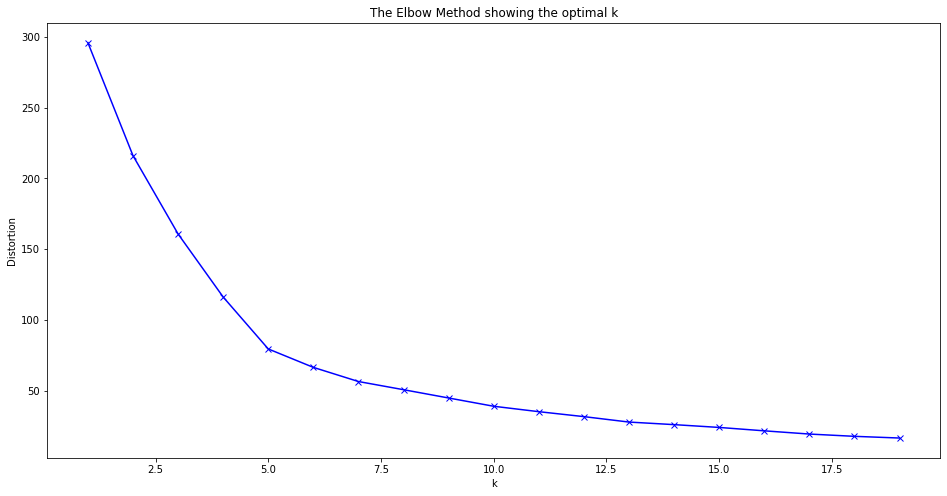

In [63]:
#Training k means on K values from 1 to 20

distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(Barcelona_df3)
    distortions.append(kmeanModel.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline 

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

For n_clusters=4, The Silhouette Coefficient is 0.3228652124096539
For n_clusters=5, The Silhouette Coefficient is 0.35124463826885627
For n_clusters=6, The Silhouette Coefficient is 0.35059566867509295
For n_clusters=7, The Silhouette Coefficient is 0.2904776250922048
For n_clusters=8, The Silhouette Coefficient is 0.2889772972494192
For n_clusters=9, The Silhouette Coefficient is 0.29469997439695655
For n_clusters=10, The Silhouette Coefficient is 0.2977755726751181


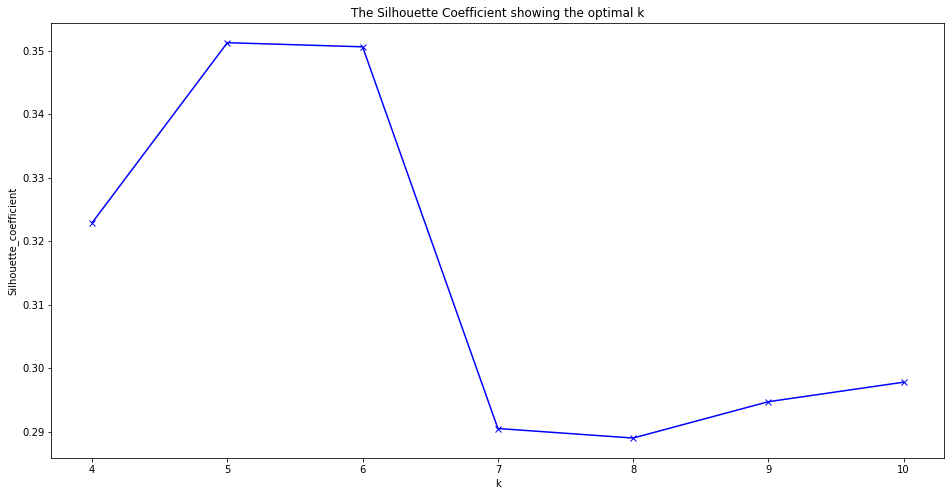

In [64]:
#The elbow appears in the range of 5-8.
#We will perform Silhouette coefficient check to determine which number of clusters is the optimum 
from sklearn.metrics import silhouette_score

sil = []
n_cluster = range(4,11)
for k in n_cluster:
    kmeans = KMeans(n_clusters=k).fit(Barcelona_df3)
    label = kmeans.labels_
    sil_coeff = silhouette_score(Barcelona_df3, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(k, sil_coeff))
    sil.append(sil_coeff)
    
plt.figure(figsize=(16,8))
plt.plot(n_cluster, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette_coefficient')
plt.title('The Silhouette Coefficient showing the optimal k')
plt.show()

---

**The optimum number of clusters is defined. Now the neighborhood clustering begins**

---

In [65]:
#K=5 is therefore the best.
kclusters=5

# run k-means clustering

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Barcelona_df3)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:73]




array([0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 3, 4, 4, 3, 3, 3, 3, 3, 3, 4, 2, 1,
       2, 2, 2, 2, 3, 4, 4, 4, 3, 3, 3, 4, 3, 4, 3, 3, 4, 4, 4, 4, 4, 3,
       3, 3, 4, 4, 4, 4, 3, 3, 4, 4, 3, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 4,
       2, 4, 2, 4, 4, 3, 3], dtype=int32)

In [66]:
#Creating a new dataframe that includes the clusters as well as the rest of the information of the neighborhoods.

In [67]:
# add clustering labels to original non standarized dataframe
Barcelona_df10.insert(0, 'Cluster Labels', kmeans.labels_)
Barcelona_df10

Cluster Labels                                  Neighborhood  \
0                0                                      el Raval   
1                0                                el Barri Gòtic   
2                4                                la Barceloneta   
3                0         Sant Pere, Santa Caterina i la Ribera   
4                0                                 el Fort Pienc   
..             ...                                           ...   
68               2  Diagonal Mar i el Front Marítim del Poblenou   
69               4                         el Besòs i el Maresme   
70               4                       Provençals del Poblenou   
71               3                      Sant Martí de Provençals   
72               3                           la Verneda i la Pau   

    Surface_(ha)   Price  Population_Density_(hab/ha)  Crime_Proportion(Nr)  
0          109.8   923.0                        434.0               23962.0  
1           84.2  1139.7                        181.0                7684.0  
2          131.4   924.0                        114.0                7566.0  
3          111.4  1020.2                        200.0               11224.0  
4           92.9  1064.4                        357.4                7345.0  
..           ...     ...                          ...                   ...  
68         120.3  1498.6                        112.0                1557.0  
69         118.5   923.0                        208.0                2845.0  
70         108.6  1013.6                        193.0                2422.0  
71          73.4   923.0                        355.0                3005.0  
72         112.7   923.0                        255.0                3320.0  

[73 rows x 6 columns]

---

**Now a dataframe containing neighborhoods, cluster numbers, coordinates, surface, population, crime and most common venues is created for results visulaization and explanation**

---

In [68]:
#getting a df with the neighborhood names and latitude, logitude values.
Base_Table_Coord=Base_Table[['Neighborhood','District','Lat','Long']]
Base_Table_Coord

Neighborhood      District        Lat  \
0                                       el Raval  Ciutat Vella  41.379518   
1                                 el Barri Gòtic  Ciutat Vella  41.383395   
2                                 la Barceloneta  Ciutat Vella  41.380653   
3          Sant Pere, Santa Caterina i la Ribera  Ciutat Vella  41.388322   
4                                  el Fort Pienc      Eixample  41.395925   
..                                           ...           ...        ...   
68  Diagonal Mar i el Front Marítim del Poblenou    Sant Martí  41.405228   
69                         el Besòs i el Maresme    Sant Martí  41.414979   
70                       Provençals del Poblenou    Sant Martí  41.411948   
71                      Sant Martí de Provençals    Sant Martí  41.416519   
72                           la Verneda i la Pau    Sant Martí  41.423220   

        Long  
0   2.168368  
1   2.176912  
2   2.189927  
3   2.177411  
4   2.182325  
..       ...  
68  2.213352  
69  2.213877  
70  2.204125  
71  2.198968  
72  2.202940  

[73 rows x 4 columns]

In [69]:
#Merging the both dataframes 
Barcelona_Semi_Final=pd.merge(Base_Table_Coord, Barcelona_df10, on=['Neighborhood'])
Barcelona_Semi_Final

Neighborhood      District        Lat  \
0                                       el Raval  Ciutat Vella  41.379518   
1                                 el Barri Gòtic  Ciutat Vella  41.383395   
2                                 la Barceloneta  Ciutat Vella  41.380653   
3          Sant Pere, Santa Caterina i la Ribera  Ciutat Vella  41.388322   
4                                  el Fort Pienc      Eixample  41.395925   
..                                           ...           ...        ...   
68  Diagonal Mar i el Front Marítim del Poblenou    Sant Martí  41.405228   
69                         el Besòs i el Maresme    Sant Martí  41.414979   
70                       Provençals del Poblenou    Sant Martí  41.411948   
71                      Sant Martí de Provençals    Sant Martí  41.416519   
72                           la Verneda i la Pau    Sant Martí  41.423220   

        Long  Cluster Labels  Surface_(ha)   Price  \
0   2.168368               0         109.8   923.0   
1   2.176912               0          84.2  1139.7   
2   2.189927               4         131.4   924.0   
3   2.177411               0         111.4  1020.2   
4   2.182325               0          92.9  1064.4   
..       ...             ...           ...     ...   
68  2.213352               2         120.3  1498.6   
69  2.213877               4         118.5   923.0   
70  2.204125               4         108.6  1013.6   
71  2.198968               3          73.4   923.0   
72  2.202940               3         112.7   923.0   

    Population_Density_(hab/ha)  Crime_Proportion(Nr)  
0                         434.0               23962.0  
1                         181.0                7684.0  
2                         114.0                7566.0  
3                         200.0               11224.0  
4                         357.4                7345.0  
..                          ...                   ...  
68                        112.0                1557.0  
69                        208.0                2845.0  
70                        193.0                2422.0  
71                        355.0                3005.0  
72                        255.0                3320.0  

[73 rows x 9 columns]

In [70]:
#Merging with the dataframe containing the list of 10 most important venues
Barcelona_Final=pd.merge(Barcelona_Semi_Final, neighborhoods_venues_sorted, on=['Neighborhood'])
Barcelona_Final

Neighborhood      District        Lat  \
0                                       el Raval  Ciutat Vella  41.379518   
1                                 el Barri Gòtic  Ciutat Vella  41.383395   
2                                 la Barceloneta  Ciutat Vella  41.380653   
3          Sant Pere, Santa Caterina i la Ribera  Ciutat Vella  41.388322   
4                                  el Fort Pienc      Eixample  41.395925   
..                                           ...           ...        ...   
68  Diagonal Mar i el Front Marítim del Poblenou    Sant Martí  41.405228   
69                         el Besòs i el Maresme    Sant Martí  41.414979   
70                       Provençals del Poblenou    Sant Martí  41.411948   
71                      Sant Martí de Provençals    Sant Martí  41.416519   
72                           la Verneda i la Pau    Sant Martí  41.423220   

        Long  Cluster Labels  Surface_(ha)   Price  \
0   2.168368               0         109.8   923.0   
1   2.176912               0          84.2  1139.7   
2   2.189927               4         131.4   924.0   
3   2.177411               0         111.4  1020.2   
4   2.182325               0          92.9  1064.4   
..       ...             ...           ...     ...   
68  2.213352               2         120.3  1498.6   
69  2.213877               4         118.5   923.0   
70  2.204125               4         108.6  1013.6   
71  2.198968               3          73.4   923.0   
72  2.202940               3         112.7   923.0   

    Population_Density_(hab/ha)  Crime_Proportion(Nr)  \
0                         434.0               23962.0   
1                         181.0                7684.0   
2                         114.0                7566.0   
3                         200.0               11224.0   
4                         357.4                7345.0   
..                          ...                   ...   
68                        112.0                1557.0   
69                        208.0                2845.0   
70                        193.0                2422.0   
71                        355.0                3005.0   
72                        255.0                3320.0   

       1st Most Common Venue     2nd Most Common Venue 3rd Most Common Venue  \
0               Cocktail Bar          Tapas Restaurant    Spanish Restaurant   
1           Tapas Restaurant            Ice Cream Shop                 Plaza   
2           Tapas Restaurant  Mediterranean Restaurant     Paella Restaurant   
3                      Hotel          Tapas Restaurant   Japanese Restaurant   
4                Coffee Shop        Chinese Restaurant            Restaurant   
..                       ...                       ...                   ...   
68  Mediterranean Restaurant                Restaurant    Italian Restaurant   
69                     Hotel                     Diner                Bakery   
70        Spanish Restaurant                      Café      Asian Restaurant   
71        Spanish Restaurant               Supermarket          Soccer Field   
72             Grocery Store                    Bakery           Coffee Shop   

   4th Most Common Venue          5th Most Common Venue 6th Most Common Venue  \
0                    Bar       Mediterranean Restaurant                  Café   
1                  Hotel                            Bar    Italian Restaurant   
2                    Bar             Spanish Restaurant        Ice Cream Shop   
3             Restaurant  Vegetarian / Vegan Restaurant                Bistro   
4     Spanish Restaurant                    Yoga Studio            Smoke Shop   
..                   ...                            ...                   ...   
68         Hot Dog Joint                          Hotel                 Beach   
69           Supermarket             Spanish Restaurant  Gym / Fitness Center   
70         Garden Center                    Sports Club            Restaurant   
71    


# 4. Results visualization and understanding

---

**Examining clusters**

---

In [71]:
#### Let's examine cluster 0

Barcelona_Final.loc[Barcelona_Final['Cluster Labels'] == 0, Barcelona_Final.columns[[0] + list(range(5, Barcelona_Final.shape[1]))]]

Neighborhood  Surface_(ha)   Price  \
0                               el Raval         109.8   923.0   
1                         el Barri Gòtic          84.2  1139.7   
3  Sant Pere, Santa Caterina i la Ribera         111.4  1020.2   
4                          el Fort Pienc          92.9  1064.4   
5                     la Sagrada Família         105.1   980.0   
6                 la Dreta de l'Eixample         212.3  1348.9   
7        l'Antiga Esquerra de l'Eixample         123.5  1194.4   
8         la Nova Esquerra de l'Eixample         133.8  1083.7   
9                            Sant Antoni          80.1  1018.4   

   Population_Density_(hab/ha)  Crime_Proportion(Nr)  \
0                        434.0               23962.0   
1                        181.0                7684.0   
3                        200.0               11224.0   
4                        357.4                7345.0   
5                        503.2               11701.0   
6                        205.4                9648.0   
7                        341.7                9332.0   
8                        437.8               12955.0   
9                        483.7                8571.0   

      1st Most Common Venue     2nd Most Common Venue  \
0              Cocktail Bar          Tapas Restaurant   
1          Tapas Restaurant            Ice Cream Shop   
3                     Hotel          Tapas Restaurant   
4               Coffee Shop        Chinese Restaurant   
5                Restaurant              Burger Joint   
6                     Hotel                  Boutique   
7                     Hotel        Spanish Restaurant   
8  Mediterranean Restaurant         Indian Restaurant   
9              Cocktail Bar  Mediterranean Restaurant   

      3rd Most Common Venue     4th Most Common Venue  \
0        Spanish Restaurant                       Bar   
1                     Plaza                     Hotel   
3       Japanese Restaurant                Restaurant   
4                Restaurant        Spanish Restaurant   
5                     Hotel        Italian Restaurant   
6  Mediterranean Restaurant                    Hostel   
7              Cocktail Bar  Mediterranean Restaurant   
8                      Café       Japanese Restaurant   
9                       Bar          Tapas Restaurant   

           5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0       Mediterranean Restaurant                  Café           Pizza Place   
1                            Bar    Italian Restaurant           Coffee Shop   
3  Vegetarian / Vegan Restaurant                Bistro                  Café   
4                    Yoga Studio            Smoke Shop      Sushi Restaurant   
5                       Wine Bar                 Plaza                Bakery   
6                         Bistro      Tapas Restaurant   Japanese Restaurant   
7            Japanese Restaurant                Bakery            Restaurant   
8                    Supermarket     Korean Restaurant                Bakery   
9                           Café                 Hotel        Sandwich Place   

           8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0                     Restaurant             Bookstore                  Hotel  
1  Vegetarian / Vegan Restaurant                Market     Falafel Restaurant  
3                   Burger Joint    Spanish Restaurant                 Hostel  
4                    Supermarket               Stadium                 Bistro  
5                    Pizza Place        Sandwich Place                   Café  
6                         Bakery             Roof Deck    Sporting Goods Shop  
7                    Pizza Place      Tapas Restaurant    Peruvian Restaurant  
8                            Gym      Tapas Restaurant                    Bar  
9                   Burger Joint           Coffee Shop     Spanish Restaurant

In [72]:
#### Let's examine cluster 1

Barcelona_Final.loc[Barcelona_Final['Cluster Labels'] == 1, Barcelona_Final.columns[[0] + list(range(5, Barcelona_Final.shape[1]))]]

Neighborhood  Surface_(ha)   Price  \
21  Vallvidrera, el Tibidabo i les Planes        1152.4  1355.5   

    Population_Density_(hab/ha)  Crime_Proportion(Nr) 1st Most Common Venue  \
21                          4.0                 349.0        Ice Cream Shop   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
21             BBQ Joint    Light Rail Station         National Park   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
21        Farmers Market                 Plaza          Soccer Field   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
21              Building     Convenience Store            Art Gallery

In [73]:
#### Let's examine cluster 2

Barcelona_Final.loc[Barcelona_Final['Cluster Labels'] == 2, Barcelona_Final.columns[[0] + list(range(5, Barcelona_Final.shape[1]))]]

Neighborhood  Surface_(ha)   Price  \
20                                     Pedralbes         270.2  2023.4   
22                                        Sarrià         303.0  1449.5   
23                               les Tres Torres          78.8  1745.0   
24                    Sant Gervasi - la Bonanova         223.5  1361.6   
25                        Sant Gervasi - Galvany         165.9  1455.9   
66                 la Vila Olímpica del Poblenou          92.5  1444.6   
68  Diagonal Mar i el Front Marítim del Poblenou         120.3  1498.6   

    Population_Density_(hab/ha)  Crime_Proportion(Nr)  \
20                         43.1                1207.0   
22                         81.0                1855.0   
23                        211.0                1253.0   
24                        114.0                1923.0   
25                        283.0                3540.0   
66                        100.0                1068.0   
68                        112.0                1557.0   

       1st Most Common Venue     2nd Most Common Venue  \
20             Hot Dog Joint                      Park   
22                    Bakery  Mediterranean Restaurant   
23                     Hotel        Mexican Restaurant   
24        Seafood Restaurant  Mediterranean Restaurant   
25  Mediterranean Restaurant             Deli / Bodega   
66                      Café                Hookah Bar   
68  Mediterranean Restaurant                Restaurant   

       3rd Most Common Venue     4th Most Common Venue 5th Most Common Venue  \
20        Spanish Restaurant  Mediterranean Restaurant                Garden   
22            Breakfast Spot                      Café      Tapas Restaurant   
23                Restaurant       Japanese Restaurant                  Café   
24                    Bakery        Spanish Restaurant   Japanese Restaurant   
25       Japanese Restaurant                      Café            Restaurant   
66  Mediterranean Restaurant                Restaurant     Paella Restaurant   
68        Italian Restaurant             Hot Dog Joint                 Hotel   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
20                 Hotel                   Bar            Print Shop   
22          Burger Joint      Pedestrian Plaza          Dessert Shop   
23          Burger Joint    Spanish Restaurant           Sports Club   
24            Restaurant           Pizza Place                   Bar   
25         Grocery Store                 Hotel        Sandwich Place   
66          Cocktail Bar             Nightclub    Italian Restaurant   
68                 Beach             Beach Bar      Football Stadium   

   9th Most Common Venue     10th Most Common Venue  
20     College Cafeteria                     Palace  
22                 Diner                 Restaurant  
23             Gastropub           Sushi Restaurant  
24         Grocery Store               Burger Joint  
25    Spanish Restaurant         Italian Restaurant  
66                   Bar  Middle Eastern Restaurant  
68                Bistro                     Buffet

In [74]:
#### Let's examine cluster 3

Barcelona_Final.loc[Barcelona_Final['Cluster Labels'] == 3, Barcelona_Final.columns[[0] + list(range(5, Barcelona_Final.shape[1]))]]

Neighborhood  Surface_(ha)   Price  \
10                        el Poble Sec          94.3   923.0   
13               la Font de la Guatlla          30.2   923.0   
14                         Hostafrancs          41.0   923.0   
15                          la Bordeta          57.7   923.0   
16                       Sants - Badal          41.1   923.0   
17                               Sants         109.8   923.0   
18                           les Corts         141.3  1116.2   
26                el Putxet i el Farró          84.6  1115.7   
30                   la Vila de Gràcia         132.1   991.5   
31  el Camp d'en Grassot i Gràcia Nova          65.1  1017.6   
32                    el Baix Guinardó          56.0   923.0   
34                         el Guinardó         130.8   923.0   
36                           el Carmel          94.2   923.0   
37                        la Teixonera          33.7   923.0   
43       Vilapicina i la Torre Llobeta          56.4   923.0   
44                               Porta          83.7   923.0   
45                 el Turó de la Peira         354.0   923.0   
50                              Verdun          23.7   923.0   
51                      la Prosperitat          59.1   923.0   
54                    Ciutat Meridiana          37.7   923.0   
59                         Sant Andreu         186.7   923.0   
60                          la Sagrera          98.6   923.0   
61            el Congrés i els Indians          40.9   923.0   
62                               Navas          42.4   923.0   
63          el Camp de l'Arpa del Clot          74.1   923.0   
64                             el Clot          69.7   923.0   
71            Sant Martí de Provençals          73.4   923.0   
72                 la Verneda i la Pau         112.7   923.0   

    Population_Density_(hab/ha)  Crime_Proportion(Nr)  \
10                        434.8                5703.0   
13                        342.1                1437.0   
14                        395.1                2253.0   
15                        326.5                2617.0   
16                        596.9                3407.0   
17                        386.6                5900.0   
18                        337.4                4938.0   
26                        345.0                2197.0   
30                        379.0                3999.0   
31                        537.0                2787.0   
32                        469.6                1528.0   
34                        273.9                2083.0   
36                        351.3                1923.0   
37                        341.1                 668.0   
43                        457.0                1395.0   
44                        316.0                1430.0   
45                        444.0                 849.0   
50                        528.0                 677.0   
51                        453.0                1448.0   
54                        287.0                 584.0   
59                        310.0                4640.0   
60                        298.0                2354.0   
61                        354.0                1162.0   
62                        523.0                1779.0   
63                        522.0                4458.0   
64                        388.0                3118.0   
71                        355.0                3005.0   
72                        255.0                3320.0   

       1st Most Common Venue 2nd Most Common Venue     3rd Most Common Venue  \
10          Tapas Restaurant                   Bar                   Theater   
13        Spanish Restaurant                 Plaza                     Hotel   
14          Tapas Restaurant    Spanish Restaurant  Mediterranean Restaurant   
15                Restaurant                  Park  Mediterranean Restaurant   
16               Pizza Place      Tapas Restaurant                      Café   
17  Mediterranean Restaurant       

In [75]:
#### Let's examine cluster 4

Barcelona_Final.loc[Barcelona_Final['Cluster Labels'] == 4, Barcelona_Final.columns[[0] + list(range(5, Barcelona_Final.shape[1]))]]

Neighborhood  Surface_(ha)   Price  \
2                      la Barceloneta         131.4   924.0   
11         la Marina del Prat Vermell          75.3   923.0   
12                  la Marina de Port         125.5   923.0   
19         la Maternitat i Sant Ramon         190.3  1078.1   
27          Vallcarca i els Penitents         125.1  1028.9   
28                            el Coll          35.3   923.0   
29                           la Salut          64.8   954.4   
33                           Can Baró          38.4   923.0   
35               la Font d'en Fargues          65.7  1044.0   
38           Sant Genís dels Agudells         171.6   923.0   
39                            Montbau         204.7   923.0   
40                   la Vall d'Hebron          73.6   954.5   
41                           la Clota          17.8   923.0   
42                              Horta         308.2   923.0   
46                        Can Peguera          11.9   923.0   
47                       la Guineueta          61.2   923.0   
48                          Canyelles          79.0   923.0   
49                       les Roquetes          64.3   923.0   
52                   la Trinitat Nova          57.7   923.0   
53                         Torre Baró         174.2   923.0   
55                           Vallbona          60.8   923.0   
56                  la Trinitat Vella          80.8   923.0   
57                      Baró de Viver          23.0   923.0   
58                      el Bon Pastor         186.5   923.0   
65  el Parc i la Llacuna del Poblenou         112.2  1072.8   
67                        el Poblenou         156.7  1051.3   
69              el Besòs i el Maresme         118.5   923.0   
70            Provençals del Poblenou         108.6  1013.6   

    Population_Density_(hab/ha)  Crime_Proportion(Nr) 1st Most Common Venue  \
2                         114.0                7566.0      Tapas Restaurant   
11                         14.4                 151.0    Spanish Restaurant   
12                        240.1                4189.0                  Café   
19                        125.9                2482.0    Spanish Restaurant   
27                        128.0                1276.0                  Café   
28                        211.0                 595.0                 Hotel   
29                        206.0                1065.0                   Bar   
33                        238.7                 532.0    Spanish Restaurant   
35                        146.2                 559.0           Pizza Place   
38                         42.1                 420.0                Bakery   
39                         25.7                 306.0                 Plaza   
40                         76.3                 327.0    Spanish Restaurant   
41                         26.9                  28.0            Food Court   
42                         90.5                1622.0      Tapas Restaurant   
46                        193.0                 124.0                  Park   
47                        251.0                 830.0                 Plaza   
48                         87.0                 372.0          Soccer Field   
49                        251.0                 873.0                 Plaza   
52                        132.0                 410.0         Grocery Store   
53                         17.0                 158.0         Metro Station   
55                         23.0                  76.0                  Park   
56                        127.0                 825.0                  Park   
57                        113.0                 208.0                 Plaza   
58                         70.0                1049.0                  Café   
65                        138.0                1783.0                 Hotel   
67                        216.0                3905.0    Spanish Restaurant   
69                        208.0                2845.0           

---

**Now an overview table containing the characteristic values of every cluster is created. This will help the final results understanding**

---

In [76]:
#Creating 1 dataframe per cluster
Barcelona_Cluster_0=Barcelona_Final.loc[Barcelona_Final['Cluster Labels'] == 0, Barcelona_Final.columns[[0] + list(range(5, Barcelona_Final.shape[1]))]]
Barcelona_Cluster_1=Barcelona_Final.loc[Barcelona_Final['Cluster Labels'] == 1, Barcelona_Final.columns[[0] + list(range(5, Barcelona_Final.shape[1]))]]
Barcelona_Cluster_2=Barcelona_Final.loc[Barcelona_Final['Cluster Labels'] == 2, Barcelona_Final.columns[[0] + list(range(5, Barcelona_Final.shape[1]))]]
Barcelona_Cluster_3=Barcelona_Final.loc[Barcelona_Final['Cluster Labels'] == 3, Barcelona_Final.columns[[0] + list(range(5, Barcelona_Final.shape[1]))]]
Barcelona_Cluster_4=Barcelona_Final.loc[Barcelona_Final['Cluster Labels'] == 4, Barcelona_Final.columns[[0] + list(range(5, Barcelona_Final.shape[1]))]]

In [77]:
#Creating a quick overview of every cluster characteristics
Final_frame = {'Cluster Nr': [0,1,2,3,4],
      'Mean Rent Price (€)': [Barcelona_Cluster_0["Price"].mean(),Barcelona_Cluster_1["Price"].mean(),Barcelona_Cluster_2["Price"].mean(),Barcelona_Cluster_3["Price"].mean(), Barcelona_Cluster_4["Price"].mean()], 
      'Mean Population Density (hab/ha)': [Barcelona_Cluster_0["Population_Density_(hab/ha)"].mean(),Barcelona_Cluster_1["Population_Density_(hab/ha)"].mean(),Barcelona_Cluster_2["Population_Density_(hab/ha)"].mean(),Barcelona_Cluster_3["Population_Density_(hab/ha)"].mean(), Barcelona_Cluster_4["Population_Density_(hab/ha)"].mean()],
      'Mean Crime Nr': [Barcelona_Cluster_0["Crime_Proportion(Nr)"].mean(),Barcelona_Cluster_1["Crime_Proportion(Nr)"].mean(),Barcelona_Cluster_2["Crime_Proportion(Nr)"].mean(),Barcelona_Cluster_3["Crime_Proportion(Nr)"].mean(), Barcelona_Cluster_4["Crime_Proportion(Nr)"].mean()],
      '1st most frequent venue': [Barcelona_Cluster_0.mode()['1st Most Common Venue'][0],Barcelona_Cluster_1.mode()['1st Most Common Venue'][0],Barcelona_Cluster_2.mode()['1st Most Common Venue'][0],Barcelona_Cluster_3.mode()['1st Most Common Venue'][0],Barcelona_Cluster_4.mode()['1st Most Common Venue'][0]],
      '2nd most frequent venue': [Barcelona_Cluster_0.mode()['2nd Most Common Venue'][0],Barcelona_Cluster_1.mode()['2nd Most Common Venue'][0],Barcelona_Cluster_2.mode()['2nd Most Common Venue'][0],Barcelona_Cluster_3.mode()['2nd Most Common Venue'][0],Barcelona_Cluster_4.mode()['2nd Most Common Venue'][0]],
      '3rd most frequent venue': [Barcelona_Cluster_0.mode()['3rd Most Common Venue'][0],Barcelona_Cluster_1.mode()['3rd Most Common Venue'][0],Barcelona_Cluster_2.mode()['3rd Most Common Venue'][0],Barcelona_Cluster_3.mode()['3rd Most Common Venue'][0],Barcelona_Cluster_4.mode()['3rd Most Common Venue'][0]]
        }

df = pd.DataFrame(data=Final_frame)

df

Cluster Nr  Mean Rent Price (€)  Mean Population Density (hab/ha)  \
0           0          1085.855556                        349.355556   
1           1          1355.500000                          4.000000   
2           2          1568.371429                        134.871429   
3           3           942.607143                        393.082143   
4           4           952.092857                        132.314286   

   Mean Crime Nr   1st most frequent venue   2nd most frequent venue  \
0   11380.222222                     Hotel          Tapas Restaurant   
1     349.000000            Ice Cream Shop                 BBQ Joint   
2    1771.857143  Mediterranean Restaurant  Mediterranean Restaurant   
3    2559.250000          Tapas Restaurant        Spanish Restaurant   
4    1321.357143        Spanish Restaurant                    Bakery   

  3rd most frequent venue  
0                     Bar  
1      Light Rail Station  
2                  Bakery  
3        Tapas Restaurant  
4              Restaurant

---

**1st cluster visualization, in a simple map with markers**

---

In [78]:
#Finally, visualizing the remaining clusters

# create map
map_Barcelona_clustered = folium.Map(location=[41.3851, 2.1734],tiles = "OpenStreetMap", zoom_start=13)

folium.CircleMarker(
        [41.3851, 2.1734],
        radius=12,
        popup='Barcelona',
        color='black',
        fill=True,
        fill_color='black',
        fill_opacity=0.1,
        parse_html=False).add_to(map_Barcelona_clustered)


# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, nei, dist, cluster in zip(Barcelona_Final['Lat'], Barcelona_Final['Long'], Barcelona_Final['Neighborhood'], Barcelona_Final['District'], Barcelona_Final['Cluster Labels']):
    label = folium.Popup(str(nei) + ' , ' + str(dist) + ', ' ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=22,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_Barcelona_clustered)
       
map_Barcelona_clustered

<img src = "https://raw.githubusercontent.com/vfafoutis/Cs_DATA_SCIENCE_Capstone/main/Map_Cluster_Mark.JPG?_sm_au_=iHVNMHW3tPvWfQDR3176jK3GsBF6F" width = 1200> </a>

---

**Now using a geojson file of barcelona, a choropleth map indicating the clusters is created. Thanks martgnz for the geojson file!**

---

In [79]:
#Copying data in a new dataframe for testing and choropleth map preparation
Barcelona_Final2=Barcelona_Final

In [80]:
Barcelona_Final2['Barri']=Barcelona_df1['NeighborhoodNr']
Barcelona_Final2

Neighborhood      District        Lat  \
0                                       el Raval  Ciutat Vella  41.379518   
1                                 el Barri Gòtic  Ciutat Vella  41.383395   
2                                 la Barceloneta  Ciutat Vella  41.380653   
3          Sant Pere, Santa Caterina i la Ribera  Ciutat Vella  41.388322   
4                                  el Fort Pienc      Eixample  41.395925   
..                                           ...           ...        ...   
68  Diagonal Mar i el Front Marítim del Poblenou    Sant Martí  41.405228   
69                         el Besòs i el Maresme    Sant Martí  41.414979   
70                       Provençals del Poblenou    Sant Martí  41.411948   
71                      Sant Martí de Provençals    Sant Martí  41.416519   
72                           la Verneda i la Pau    Sant Martí  41.423220   

        Long  Cluster Labels  Surface_(ha)   Price  \
0   2.168368               0         109.8   923.0   
1   2.176912               0          84.2  1139.7   
2   2.189927               4         131.4   924.0   
3   2.177411               0         111.4  1020.2   
4   2.182325               0          92.9  1064.4   
..       ...             ...           ...     ...   
68  2.213352               2         120.3  1498.6   
69  2.213877               4         118.5   923.0   
70  2.204125               4         108.6  1013.6   
71  2.198968               3          73.4   923.0   
72  2.202940               3         112.7   923.0   

    Population_Density_(hab/ha)  Crime_Proportion(Nr)  \
0                         434.0               23962.0   
1                         181.0                7684.0   
2                         114.0                7566.0   
3                         200.0               11224.0   
4                         357.4                7345.0   
..                          ...                   ...   
68                        112.0                1557.0   
69                        208.0                2845.0   
70                        193.0                2422.0   
71                        355.0                3005.0   
72                        255.0                3320.0   

       1st Most Common Venue     2nd Most Common Venue 3rd Most Common Venue  \
0               Cocktail Bar          Tapas Restaurant    Spanish Restaurant   
1           Tapas Restaurant            Ice Cream Shop                 Plaza   
2           Tapas Restaurant  Mediterranean Restaurant     Paella Restaurant   
3                      Hotel          Tapas Restaurant   Japanese Restaurant   
4                Coffee Shop        Chinese Restaurant            Restaurant   
..                       ...                       ...                   ...   
68  Mediterranean Restaurant                Restaurant    Italian Restaurant   
69                     Hotel                     Diner                Bakery   
70        Spanish Restaurant                      Café      Asian Restaurant   
71        Spanish Restaurant               Supermarket          Soccer Field   
72             Grocery Store                    Bakery           Coffee Shop   

   4th Most Common Venue          5th Most Common Venue 6th Most Common Venue  \
0                    Bar       Mediterranean Restaurant                  Café   
1                  Hotel                            Bar    Italian Restaurant   
2                    Bar             Spanish Restaurant        Ice Cream Shop   
3             Restaurant  Vegetarian / Vegan Restaurant                Bistro   
4     Spanish Restaurant                    Yoga Studio            Smoke Shop   
..                   ...                            ...                   ...   
68         Hot Dog Joint                          Hotel                 Beach   
69           Supermarket             Spanish Restaurant  Gym / Fitness Center   
70         Garden Center                    Sports Club            Restaurant   
71    

In [81]:
# download barcelona neighborhood geojson file from github. Thanks martgnz!
!wget --quiet https://raw.githubusercontent.com/martgnz/bcn-geodata/master/barris/barris.geojson?_sm_au_=iHV08PQ1WkMrt6pN3176jK3GsBF6F -O barris.geojson
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [82]:
barris_geo = r'barris.geojson' # geojson file

In [83]:
#Creating a threshold list to define the choroplethmap labels scale
threshold_scale=[0,1,2,3,4,5]
threshold_scale

[0, 1, 2, 3, 4, 5]

In [84]:
Barcelona_Clustered_choro = folium.Map(location=[41.3851, 2.1734],tiles = "OpenStreetMap", zoom_start=13)


# generate choropleth map using the cluster labels
Barcelona_Clustered_choro.choropleth(
    geo_data=barris_geo,
    data=Barcelona_Final2,
    columns=['Neighborhood', 'Cluster Labels'],
    key_on='feature.properties.NOM',
    threshold_scale=threshold_scale,
    fill_color='BuPu', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Clusters'
)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, nei, dist, cluster in zip(Barcelona_Final['Lat'], Barcelona_Final['Long'], Barcelona_Final['Neighborhood'], Barcelona_Final['District'], Barcelona_Final['Cluster Labels']):
    label = folium.Popup(str(nei) + ' , ' + str(dist) + ', ' ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color='black',
        fill_opacity=0.7).add_to(Barcelona_Clustered_choro)

# display map
Barcelona_Clustered_choro

**We see that the poble sec neighborhood is not properly indicated. After exploration this is caused because the string names in our database and the geojson file are not the same. Lets improve this..**

In [85]:
#Creating a new test database
Barcelona_Final23=Barcelona_Final2

Barcelona_Final23

Neighborhood      District        Lat  \
0                                       el Raval  Ciutat Vella  41.379518   
1                                 el Barri Gòtic  Ciutat Vella  41.383395   
2                                 la Barceloneta  Ciutat Vella  41.380653   
3          Sant Pere, Santa Caterina i la Ribera  Ciutat Vella  41.388322   
4                                  el Fort Pienc      Eixample  41.395925   
..                                           ...           ...        ...   
68  Diagonal Mar i el Front Marítim del Poblenou    Sant Martí  41.405228   
69                         el Besòs i el Maresme    Sant Martí  41.414979   
70                       Provençals del Poblenou    Sant Martí  41.411948   
71                      Sant Martí de Provençals    Sant Martí  41.416519   
72                           la Verneda i la Pau    Sant Martí  41.423220   

        Long  Cluster Labels  Surface_(ha)   Price  \
0   2.168368               0         109.8   923.0   
1   2.176912               0          84.2  1139.7   
2   2.189927               4         131.4   924.0   
3   2.177411               0         111.4  1020.2   
4   2.182325               0          92.9  1064.4   
..       ...             ...           ...     ...   
68  2.213352               2         120.3  1498.6   
69  2.213877               4         118.5   923.0   
70  2.204125               4         108.6  1013.6   
71  2.198968               3          73.4   923.0   
72  2.202940               3         112.7   923.0   

    Population_Density_(hab/ha)  Crime_Proportion(Nr)  \
0                         434.0               23962.0   
1                         181.0                7684.0   
2                         114.0                7566.0   
3                         200.0               11224.0   
4                         357.4                7345.0   
..                          ...                   ...   
68                        112.0                1557.0   
69                        208.0                2845.0   
70                        193.0                2422.0   
71                        355.0                3005.0   
72                        255.0                3320.0   

       1st Most Common Venue     2nd Most Common Venue 3rd Most Common Venue  \
0               Cocktail Bar          Tapas Restaurant    Spanish Restaurant   
1           Tapas Restaurant            Ice Cream Shop                 Plaza   
2           Tapas Restaurant  Mediterranean Restaurant     Paella Restaurant   
3                      Hotel          Tapas Restaurant   Japanese Restaurant   
4                Coffee Shop        Chinese Restaurant            Restaurant   
..                       ...                       ...                   ...   
68  Mediterranean Restaurant                Restaurant    Italian Restaurant   
69                     Hotel                     Diner                Bakery   
70        Spanish Restaurant                      Café      Asian Restaurant   
71        Spanish Restaurant               Supermarket          Soccer Field   
72             Grocery Store                    Bakery           Coffee Shop   

   4th Most Common Venue          5th Most Common Venue 6th Most Common Venue  \
0                    Bar       Mediterranean Restaurant                  Café   
1                  Hotel                            Bar    Italian Restaurant   
2                    Bar             Spanish Restaurant        Ice Cream Shop   
3             Restaurant  Vegetarian / Vegan Restaurant                Bistro   
4     Spanish Restaurant                    Yoga Studio            Smoke Shop   
..                   ...                            ...                   ...   
68         Hot Dog Joint                          Hotel                 Beach   
69           Supermarket             Spanish Restaurant  Gym / Fitness Center   
70         Garden Center                    Sports Club            Restaurant   
71    

In [86]:
#Substituting the necessary value
Barcelona_Final23['Neighborhood'] = Barcelona_Final23['Neighborhood'].replace(['el Poble Sec'],'el Poble-sec')
Barcelona_Final23.at[10,'Neighborhood']

'el Poble-sec'

---

**Improved choropleth map**

---

In [87]:
#Creating the map again
Barcelona_Clustered_choro = folium.Map(location=[41.3851, 2.1734],tiles = "OpenStreetMap", zoom_start=13)


# generate choropleth map using cluster labels
Barcelona_Clustered_choro.choropleth(
    geo_data=barris_geo,
    data=Barcelona_Final23,
    columns=['Neighborhood', 'Cluster Labels'],
    key_on='feature.properties.NOM',
    threshold_scale=threshold_scale,
    fill_color='BuPu', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Clusters'
)


# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, nei, dist, cluster in zip(Barcelona_Final23['Lat'], Barcelona_Final23['Long'], Barcelona_Final23['Neighborhood'], Barcelona_Final23['District'], Barcelona_Final23['Cluster Labels']):
    label = folium.Popup(str(nei) + ' , ' + str(dist) + ', ' ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=4,
        popup=label,
        color='black',
        fill=True,
        fill_color='black',
        fill_opacity=0.4).add_to(Barcelona_Clustered_choro)

# display map
Barcelona_Clustered_choro

**(Reminder of cluster contents)**

In [88]:
df

Cluster Nr  Mean Rent Price (€)  Mean Population Density (hab/ha)  \
0           0          1085.855556                        349.355556   
1           1          1355.500000                          4.000000   
2           2          1568.371429                        134.871429   
3           3           942.607143                        393.082143   
4           4           952.092857                        132.314286   

   Mean Crime Nr   1st most frequent venue   2nd most frequent venue  \
0   11380.222222                     Hotel          Tapas Restaurant   
1     349.000000            Ice Cream Shop                 BBQ Joint   
2    1771.857143  Mediterranean Restaurant  Mediterranean Restaurant   
3    2559.250000          Tapas Restaurant        Spanish Restaurant   
4    1321.357143        Spanish Restaurant                    Bakery   

  3rd most frequent venue  
0                     Bar  
1      Light Rail Station  
2                  Bakery  
3        Tapas Restaurant  
4              Restaurant

**Comments on results are found in the final report**



<img src = "https://raw.githubusercontent.com/vfafoutis/Cs_DATA_SCIENCE_Capstone/main/Map_Cluster_Choropleth.JPG?_sm_au_=iHVNMHW3tPvWfQDR3176jK3GsBF6F" width = 1200> </a>